<a href="https://colab.research.google.com/github/Athman-Athman/RESEARCH/blob/main/RESEARCH_DATA_ANALYSIS_VTT_NOV_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [13]:
# Importing libraries and reloading the data
import pandas as pd

# Loading the dataset
file_path = './DATA_RESEARCH - Copy.xlsx'
data = pd.read_excel(file_path)

# Retrieving the number of rows and columns
rows, columns = data.shape

rows, columns


(3091, 81)

In [19]:
# Display the variables (column names) in Sheet1
variables = sheet1_data.columns.tolist()

variables


['SN',
 'VESSEL',
 'REFERENCE NUMBER',
 'VOYAGE NUMBER',
 'LOA',
 'ROT',
 'BERTH',
 'DRAFT (ARRIVAL)',
 'DRAFT (DEPARTURE)',
 'LINE',
 'SERVICE',
 "DISCHARGED-(FULL/ FCL-20')",
 "DISCHARGED-(FULL/ FCL-40')",
 "DISCHARGED-(FULL/ LCL-20')",
 "DISCHARGED-(FULL/ LCL-40')",
 "DISCHARGED-(EMPTY-20')",
 "DISCHARGED-(EMPTY-40')",
 "DISCHARGED-(REEFER-20')",
 "DISCHARGED-(REEFER-40')",
 "DISCHARGED-(HAZARDOUS-20')",
 "DISCHARGED-(HAZARDOUS-40')",
 "DISCHARGED-(OUT OF GAUGE-20')",
 "DISCHARGED-(OUT OF GAUGE-40')",
 "DISCHARGED-(TRANS SHIPMENT-20')",
 "DISCHARGED-(TRANS SHIPMENT-40')",
 "DISCHARGED-(ON BOARD SHIFTING-20')",
 "DISCHARGED-(ON BOARD SHIFTING-40')",
 "DISCHARGED-(SHIFTING VIA QUAY-20')",
 "DISCHARGED-(SHIFTING VIA QUAY-40')",
 "LOADED-(FULL/ FCL-20')",
 "LOADED-(FULL/ FCL-40')",
 "LOADED-(FULL/ LCL-20')",
 "LOADED-(FULL/ LCL-40')",
 "LOADED-(EMPTY-20')",
 "LOADED-(EMPTY-40')",
 "LOADED-(REEFER-20')",
 "LOADED-(REEFER-40')",
 "LOADED-(HAZARDOUS-20')",
 "LOADED-(HAZARDOUS-40')",
 "LOAD

In [27]:
# Convert date columns to datetime format,
date_columns = ['ARRIVED_O/A', 'ARRIVED_BERTH', 'COMMENCE_OPS', 'COMPL._OP', 'TIME/DATE_SAILED']

for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

In [28]:
# Display unique values of the 'MACHINE TYPE' column
unique_machine_types = data['MACHINE TYPE'].unique()

unique_machine_types


array(['SSG', 'SC', nan, 'SSG ', 'SS', 'SC ', 'SCG', 'SGG'], dtype=object)

In [30]:
# Replace 'SS' with 'SC' in the 'MACHINE TYPE' column
data['MACHINE TYPE'] = data['MACHINE TYPE'].str.strip()
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SS','SC')
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SGG','SSG')
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SCG','SSG')

# Re-check unique values after replacement
unique_machine_types_final = data['MACHINE TYPE'].unique()

# Display the updated unique values
unique_machine_types_final


array(['SSG', 'SC', nan], dtype=object)

In [160]:
from sklearn.preprocessing import LabelEncoder

# Convert 'MACHINE TYPE' to numeric values
if 'MACHINE TYPE' in data.columns:
    label_encoder = LabelEncoder()
    data['MACHINE_TYPE_NUMERIC'] = label_encoder.fit_transform(data['MACHINE TYPE'])

# Display the mapping for reference
machine_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(machine_type_mapping)

{'SC': 0, 'SSG': 1, nan: 2}


In [35]:
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Calculate the new variables
data['WAITING_TIME_TO_DOCK'] = data['ARRIVED BERTH'] - data['ARRIVED O/A']
data['WAITING_OPERATIONS'] = data['COMMENCE OPS'] - data['ARRIVED BERTH']
data['OPERATION_TIME'] = data['COMPL. OP'] - data['COMMENCE OPS']
data['UNLOADING_TIME'] = data['TIME/DATE SAILED'] - data['COMPL. OP']

# Display the updated dataset with the new variables
data.head()

,SN,VESSEL,REFERENCE NUMBER,VOYAGE NUMBER,LOA,ROT,BERTH,DRAFT (ARRIVAL),DRAFT (DEPARTURE),LINE,...,SHIP WORKING HOURS,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,MACHINE TYPE,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME
0,1,WEHR WARNOW,MSKC/WEHRWAR/1201,1201,NaN,4294,9,7.6,8.7,MSK,...,20.66,25.605034,2.512467,16.318766,18.085470,SSG,7 days 09:08:00,0 days 01:10:00,1 days 05:15:00,0 days 02:00:00
1,2,ROYAL ZANZIBAR,MSCC/ROYZAN/1007R,1007R,NaN,4353,10,3.2,4.5,MSC,...,11.75,8.340426,0.746004,4.215054,4.900000,SC,4 days 11:07:00,0 days 01:05:00,0 days 20:00:00,0 days 02:10:00
2,3,MANTENHA,MSCC/MVMANT/160R,160R,NaN,4270,9,3.4,4.5,MSC,...,12.25,8.163265,0.346861,3.296703,3.921569,SC,40 days 17:58:00,-30 days +00:50:00,1 days 01:30:00,0 days 04:00:00
3,4,PARDIS,HDSC/PARDIS/SAS0017,SAS0017,NaN,4259,11,11.4,9.7,HDSC,...,48.57,23.800700,3.630463,17.232298,18.595174,SSG,10 days 10:20:00,0 days 02:10:00,2 days 14:10:00,0 days 02:45:00
4,5,MSC JASMINE,MSCC/MSCJAS/52R,52R,NaN,4299,9,11.2,10,MSC,...,29.00,30.275862,3.053913,19.191257,21.029940,SSG,10 days 00:45:00,0 days 01:30:00,1 days 17:45:00,0 days 02:30:00


In [86]:
# Filter the dataset to show rows where any of the new variables have negative values
negative_values = data[
    (data['WAITING_TIME_TO_DOCK'] < pd.Timedelta(0)) |
    (data['WAITING_OPERATIONS'] < pd.Timedelta(0)) |
    (data['OPERATION_TIME'] < pd.Timedelta(0)) |
    (data['UNLOADING_TIME'] < pd.Timedelta(0))
]
negative_values[['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME']]


,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME
2,40 days 17:58:00,-30 days +00:50:00,1 days 01:30:00,0 days 04:00:00
345,1 days 02:35:00,1 days 01:30:00,-1 days +17:50:00,0 days 01:20:00
469,2 days 11:44:00,-1 days +19:25:00,2 days 03:15:00,0 days 12:40:00
488,3 days 07:20:00,-1 days +21:10:00,2 days 23:30:00,0 days 01:00:00
628,-18 days +14:50:00,18 days 01:55:00,2 days 06:40:00,0 days 03:00:00
726,1 days 18:25:00,0 days 01:43:00,-28 days +09:52:00,29 days 01:00:00
842,2 days 01:54:00,-1 days +23:04:00,2 days 14:50:00,0 days 00:30:00


In [105]:
# Count the number of rows with negative values for each of the new variables
negative_counts = {
    'WAITING_TIME_TO_DOCK': (data['WAITING_TIME_TO_DOCK'] < pd.Timedelta(0)).sum(),
    'WAITING_OPERATIONS': (data['WAITING_OPERATIONS'] < pd.Timedelta(0)).sum(),
    'OPERATION_TIME': (data['OPERATION_TIME'] < pd.Timedelta(0)).sum(),
    'UNLOADING_TIME': (data['UNLOADING_TIME'] < pd.Timedelta(0)).sum()
}
negative_counts


{'WAITING_TIME_TO_DOCK': 1,
 'WAITING_OPERATIONS': 4,
 'OPERATION_TIME': 2,
 'UNLOADING_TIME': 0}

In [144]:
# Drop rows with negative values in any of the newly created variables
cleaned_data = data[
    (data['WAITING_TIME_TO_DOCK'] >= pd.Timedelta(0)) &
    (data['WAITING_OPERATIONS'] >= pd.Timedelta(0)) &
    (data['OPERATION_TIME'] >= pd.Timedelta(0)) &
    (data['UNLOADING_TIME'] >= pd.Timedelta(0))
]

# Display the shape of the dataset after dropping rows
cleaned_data.shape


(3083, 792)

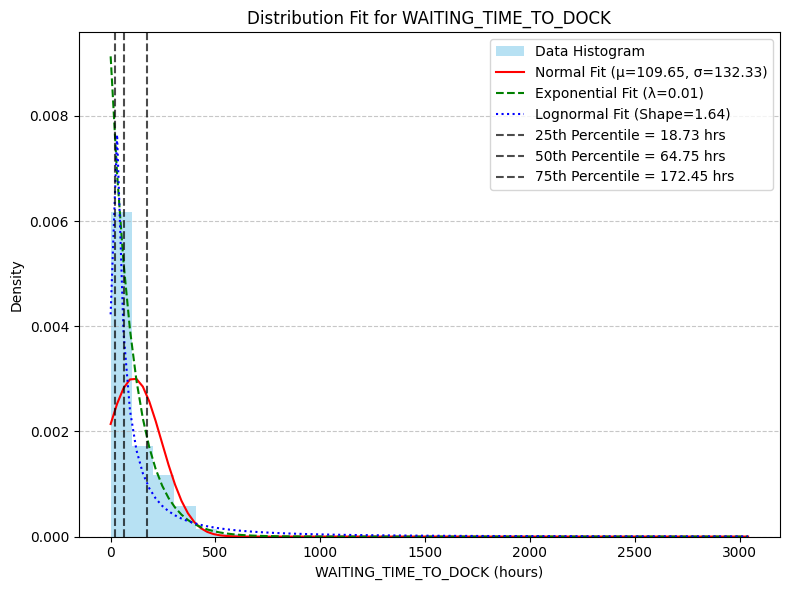

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, lognorm

# Convert datetime data to total hours (for numeric operations)
cleaned_data = cleaned_data['WAITING_TIME_TO_DOCK'].dropna()
cleaned_data = cleaned_data.dt.total_seconds() / 3600  # Convert to hours

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the cleaned data histogram
plt.hist(cleaned_data, bins=30, density=True, alpha=0.6, color='skyblue', label='Data Histogram')

# Fit and plot normal distribution
mu, std = norm.fit(cleaned_data)
x = np.linspace(cleaned_data.min(), cleaned_data.max(), 100)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'r-', label=f'Normal Fit (μ={mu:.2f}, σ={std:.2f})')

# Fit and plot exponential distribution
loc, scale = expon.fit(cleaned_data)
p_expon = expon.pdf(x, loc, scale)
plt.plot(x, p_expon, 'g--', label=f'Exponential Fit (λ={1/scale:.2f})')

# Fit and plot lognormal distribution
shape, loc_ln, scale_ln = lognorm.fit(cleaned_data, floc=0)
p_lognorm = lognorm.pdf(x, shape, loc_ln, scale_ln)
plt.plot(x, p_lognorm, 'b:', label=f'Lognormal Fit (Shape={shape:.2f})')

# Highlight percentiles
percentiles = {'25th Percentile': np.percentile(cleaned_data, 25),
               '50th Percentile': np.percentile(cleaned_data, 50),
               '75th Percentile': np.percentile(cleaned_data, 75)}
for p, value in percentiles.items():
    plt.axvline(value, color='k', linestyle='--', alpha=0.7, label=f'{p} = {value:.2f} hrs')

# Add labels and legend
plt.title('Distribution Fit for WAITING_TIME_TO_DOCK')
plt.xlabel('WAITING_TIME_TO_DOCK (hours)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


FEATURE SELECTION

In [138]:
# Define the target variable (TAT)
data['TURN_AROUND_TIME'] = pd.to_datetime(data['DROP PILOT']) - pd.to_datetime(data['ARRIVED O/A'])
data['TURN_AROUND_TIME_HOURS'] = data['TURN_AROUND_TIME'].dt.total_seconds() / 3600

In [164]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Ensure 'TURN_AROUND_TIME_HOURS' is numeric and non-NaN
cleaned_data = data.dropna(subset=['TURN_AROUND_TIME_HOURS'] + candidate_features)
cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)

# Label encode 'MACHINE TYPE' if it's categorical
if 'MACHINE TYPE' in cleaned_data.columns:
    encoder = LabelEncoder()
    cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))

# Define features (X) and target (y)
candidate_features = [
    'TOTAL TEUs','WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','PORT PRODUCTIVITY', 'BERTH PRODUCTIVITY',
    'OPERATIONS PRODUCTIVITY',
    'MACHINE TYPE'
]
X = cleaned_data[candidate_features]
y = cleaned_data['TURN_AROUND_TIME_HOURS']

# 1. Correlation-based feature selection
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix['TURN_AROUND_TIME_HOURS'].sort_values(ascending=False)

# 2. Univariate feature selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-based feature selection (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': feature_importances
}

# Display feature selection results
print(feature_selection_results)


<ipython-input-164-b2f1623cabee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)
<ipython-input-164-b2f1623cabee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))


DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [166]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Ensure 'TURN_AROUND_TIME_HOURS' is numeric and non-NaN
cleaned_data = data.dropna(subset=['TURN_AROUND_TIME_HOURS'] + candidate_features)
cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)

# Label encode 'MACHINE TYPE' if it's categorical
if 'MACHINE TYPE' in cleaned_data.columns:
    encoder = LabelEncoder()
    cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))

# Define features (X) and target (y)
candidate_features = [
    'TOTAL TEUs','WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','PORT PRODUCTIVITY', 'BERTH PRODUCTIVITY',
    'OPERATIONS PRODUCTIVITY',
    'MACHINE TYPE'
]

# Convert Timedelta features to numeric (total seconds)
for feature in ['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME']:
    if feature in cleaned_data.columns:
        cleaned_data[feature] = cleaned_data[feature].dt.total_seconds()  # Convert to total seconds

X = cleaned_data[candidate_features]
y = cleaned_data['TURN_AROUND_TIME_HOURS']

# 1. Correlation-based feature selection
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix['TURN_AROUND_TIME_HOURS'].sort_values(ascending=False)

# 2. Univariate feature selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-based feature selection (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': feature_importances
}

# Display feature selection results
print(feature_selection_results)

<ipython-input-166-9632c2d0c8e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)
<ipython-input-166-9632c2d0c8e0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))
<ipython-input-166-9632c2d0c8e0>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

{'Correlation with Target': {'TURN_AROUND_TIME_HOURS': 1.0, 'OPERATION_TIME': 0.034121485692826616, 'WAITING_TIME_TO_DOCK': 0.027036491051150323, 'WAITING_OPERATIONS': 0.00457808865864965, 'UNLOADING_TIME': 0.002498037887468299, 'TOTAL TEUs': -0.0006060378968035765, 'PORT PRODUCTIVITY': -0.015109737503043811, 'MACHINE TYPE': -0.01638939996661377, 'OPERATIONS PRODUCTIVITY': -0.05344762694092492, 'BERTH PRODUCTIVITY': -0.05440446653934405}, 'Univariate Scores': {'TOTAL TEUs': 0.0005850803331420819, 'WAITING_TIME_TO_DOCK': 1.1652899485833612, 'WAITING_OPERATIONS': 0.033388220736203636, 'OPERATION_TIME': 1.8568532161535536, 'UNLOADING_TIME': 0.00994068993837939, 'PORT PRODUCTIVITY': 0.36377158925535547, 'BERTH PRODUCTIVITY': 4.729031851144157, 'OPERATIONS PRODUCTIVITY': 4.563678405765051, 'MACHINE TYPE': 0.42801457304124485}, 'Model Importances': {'TOTAL TEUs': 0.15112093482768743, 'WAITING_TIME_TO_DOCK': 0.11096180241958568, 'WAITING_OPERATIONS': 0.12163367029493509, 'OPERATION_TIME': 0.1

In [170]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Define target and candidate features
target = 'TURN_AROUND_TIME_HOURS'
candidate_features = [
    'TOTAL TEUs', 'WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME',
    'UNLOADING_TIME', 'PORT PRODUCTIVITY', 'BERTH PRODUCTIVITY',
    'OPERATIONS PRODUCTIVITY', 'MACHINE TYPE'
]

# Drop rows with NaN values in target or candidate features
cleaned_data = data.dropna(subset=[target] + candidate_features)

# Ensure target is numeric
cleaned_data[target] = cleaned_data[target].astype(float)

# Encode 'MACHINE TYPE' as numeric if it exists
if 'MACHINE TYPE' in cleaned_data.columns:
    encoder = LabelEncoder()
    cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))

# Convert timedelta columns to numeric (total seconds)
timedelta_features = ['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME']
for feature in timedelta_features:
    if feature in cleaned_data.columns:
        cleaned_data[feature] = cleaned_data[feature].dt.total_seconds()

# Define features (X) and target (y)
X = cleaned_data[candidate_features]
y = cleaned_data[target]

# Feature Selection Techniques
# 1. Correlation with Target
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)

# 2. Univariate Feature Selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-Based Feature Importance (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
model_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': model_importances
}

# Combine results into a DataFrame for tabular representation
results_table = pd.DataFrame({
    'Feature': candidate_features,
    'Correlation with Target': [feature_selection_results['Correlation with Target'].get(f, None) for f in candidate_features],
    'Univariate Scores': [feature_selection_results['Univariate Scores'].get(f, None) for f in candidate_features],
    'Model Importances': [feature_selection_results['Model Importances'].get(f, None) for f in candidate_features],
})

# Sort results by Model Importances for better readability
results_table = results_table.sort_values(by='Model Importances', ascending=False)

# Print Results
print(results_table)


<ipython-input-170-442f1e8682bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[target] = cleaned_data[target].astype(float)
<ipython-input-170-442f1e8682bd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))
<ipython-input-170-442f1e8682bd>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

                   Feature  Correlation with Target  Univariate Scores  \
7  OPERATIONS PRODUCTIVITY                -0.053448           4.563678   
0               TOTAL TEUs                -0.000606           0.000585   
5        PORT PRODUCTIVITY                -0.015110           0.363772   
3           OPERATION_TIME                 0.034121           1.856853   
2       WAITING_OPERATIONS                 0.004578           0.033388   
1     WAITING_TIME_TO_DOCK                 0.027036           1.165290   
6       BERTH PRODUCTIVITY                -0.054404           4.729032   
4           UNLOADING_TIME                 0.002498           0.009941   
8             MACHINE TYPE                -0.016389           0.428015   

   Model Importances  
7           0.157829  
0           0.151121  
5           0.136422  
3           0.122943  
2           0.121634  
1           0.110962  
6           0.098171  
4           0.077432  
8           0.023487  


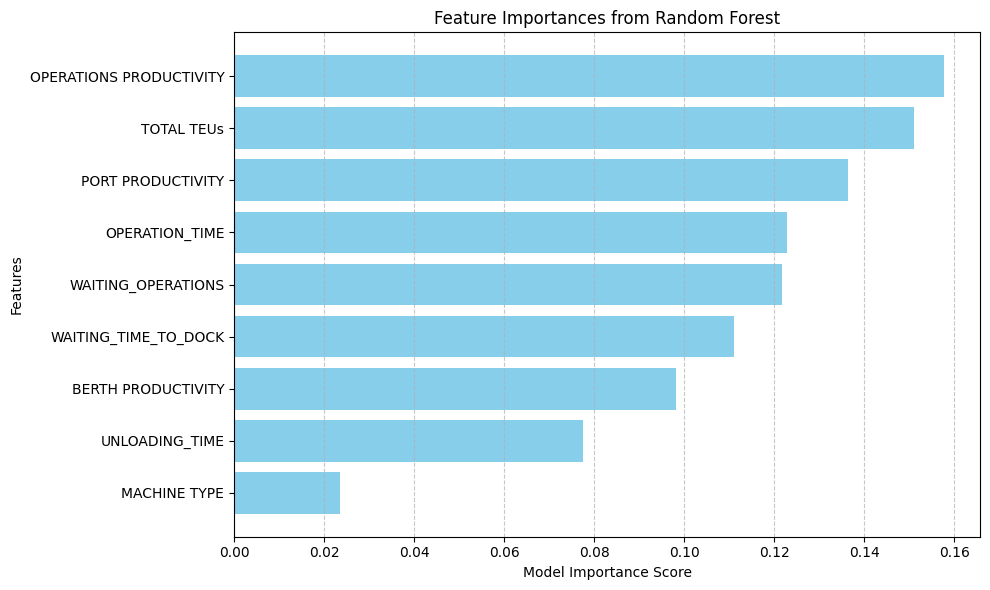

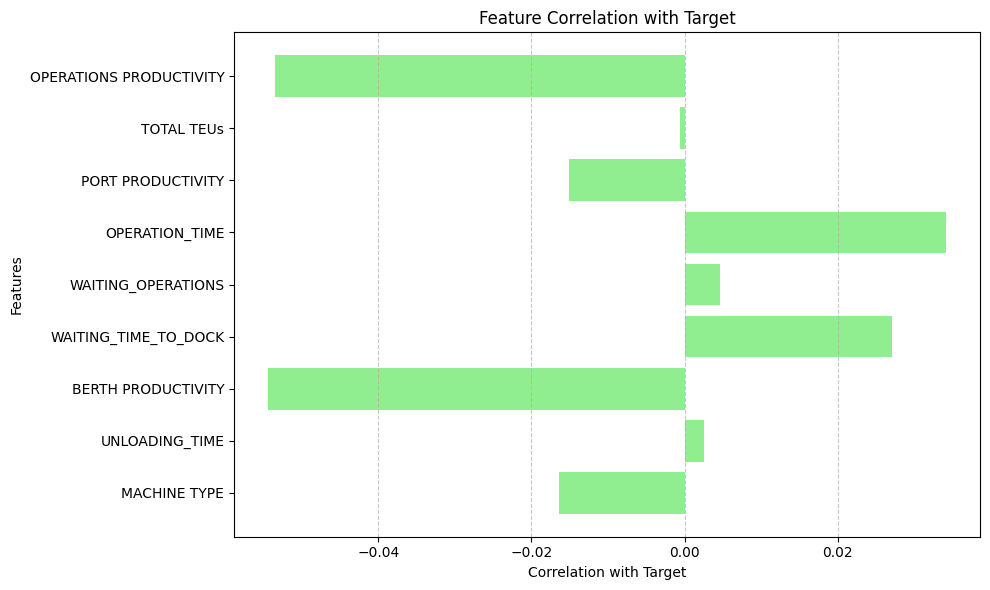

In [171]:
import matplotlib.pyplot as plt

# Visualize feature importances from Random Forest
plt.figure(figsize=(10, 6))
plt.barh(results_table['Feature'], results_table['Model Importances'], color='skyblue')
plt.xlabel('Model Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize correlation with target
plt.figure(figsize=(10, 6))
plt.barh(results_table['Feature'], results_table['Correlation with Target'], color='lightgreen')
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.title('Feature Correlation with Target')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


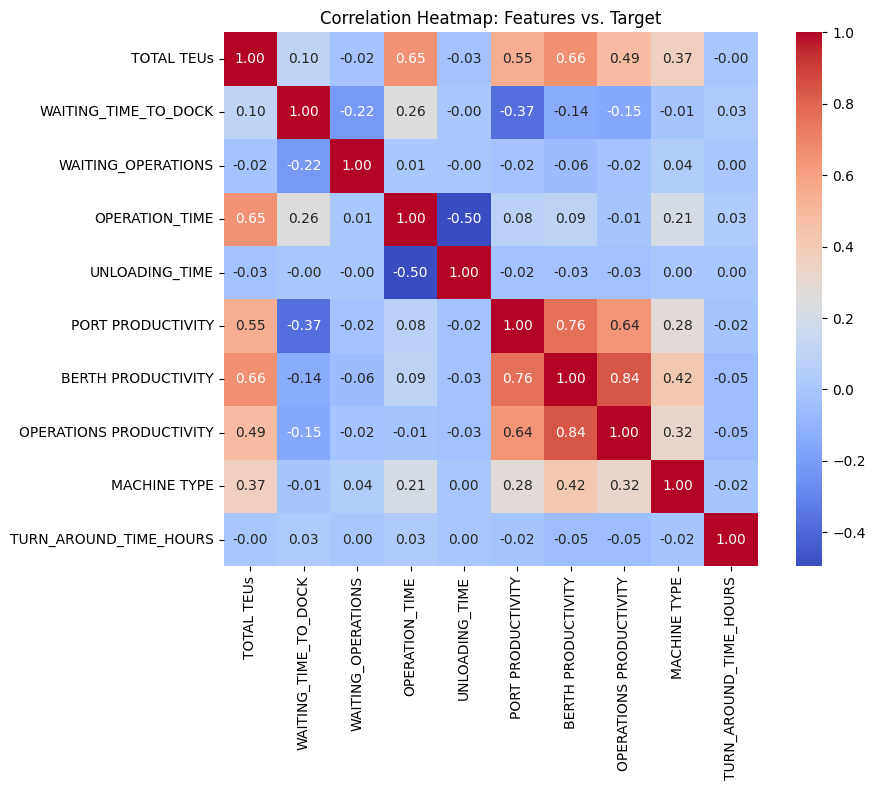

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract correlation matrix for the candidate features and target
correlation_matrix = cleaned_data[candidate_features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap: Features vs. Target')
plt.tight_layout()
plt.show()


Key Points from the Heatmap:

    Diagonal Values:
        All diagonal cells are 1.0, as they represent the correlation of each feature with itself.

    Correlation with Target (TURN_AROUND_TIME_HOURS):
        Look at the last row (TURN_AROUND_TIME_HOURS) for correlations with each feature.
        Features with stronger correlations (close to 1 or -1) are more predictive of the target.
        Example:
            MACHINE TYPE and TURN_AROUND_TIME_HOURS have a low correlation (~ -0.02).
            BERTH PRODUCTIVITY also shows minimal correlation (~ -0.05).

    Inter-feature Correlations:
        Strong inter-feature correlations can indicate multicollinearity, which might affect model performance.
        Example:
            PORT PRODUCTIVITY and BERTH PRODUCTIVITY have a strong positive correlation (~0.76).

    Feature Independence:
        Features with low correlation with others are independent and may carry unique predictive value.
        Example:
            WAITING_OPERATIONS is weakly correlated with most other features.

Observations for Feature Selection:

    Highly Correlated Features:
        BERTH PRODUCTIVITY and PORT PRODUCTIVITY are strongly correlated; consider using one of them to avoid redundancy.
    Weak Predictive Features:
        Features like UNLOADING_TIME and MACHINE TYPE show very low correlation with the target and may be excluded.
    Key Predictive Features:
        Features like OPERATION_TIME and TOTAL TEUs show moderate correlation (~0.65), making them strong candidates for inclusion.



In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate Variance Inflation Factor (VIF)
X_features = cleaned_data[candidate_features].dropna()  # Drop rows with NaN for accurate VIF calculation

# VIF calculation requires numeric data only
vif_data = pd.DataFrame()
vif_data["Feature"] = X_features.columns
vif_data["VIF"] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]

# Display the VIF values
print(vif_data)


                   Feature        VIF
0               TOTAL TEUs  23.944410
1     WAITING_TIME_TO_DOCK   2.064011
2       WAITING_OPERATIONS   1.101672
3           OPERATION_TIME  16.733744
4           UNLOADING_TIME   2.330542
5        PORT PRODUCTIVITY   8.251969
6       BERTH PRODUCTIVITY  41.024850
7  OPERATIONS PRODUCTIVITY  16.281429
8             MACHINE TYPE  12.650358


How to Interpret VIF:

    VIF < 5: Low multicollinearity (acceptable).
    VIF 5-10: Moderate multicollinearity (may require attention).
    VIF > 10: High multicollinearity (consider removing or transforming features).


Explanation:

    VIF Calculation:
        The function calculate_vif computes the VIF for all features.

    Feature Removal:
        The feature with the highest VIF is removed iteratively until all remaining features have VIF <= 10.

    Final Output:
        Displays the refined feature set and their corresponding VIF values.

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initial VIF calculation
current_features = cleaned_data[candidate_features].dropna()
vif_data = calculate_vif(current_features)

# Iteratively remove features with high VIF (>10)
while vif_data["VIF"].max() > 10:
    # Find the feature with the highest VIF
    high_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
    print(f"Removing feature with high VIF: {high_vif_feature} (VIF={vif_data['VIF'].max():.2f})")

    # Drop the feature and recalculate VIF
    current_features = current_features.drop(columns=[high_vif_feature])
    vif_data = calculate_vif(current_features)

# Final VIF DataFrame after refinement
refined_features = current_features.columns.tolist()
final_vif_data = calculate_vif(current_features)

# Display refined features and VIF values
print("Refined Features and Their VIF:")
print(final_vif_data)


Removing feature with high VIF: BERTH PRODUCTIVITY (VIF=41.02)
Removing feature with high VIF: TOTAL TEUs (VIF=16.37)
Refined Features and Their VIF:
                   Feature       VIF
0     WAITING_TIME_TO_DOCK  2.002516
1       WAITING_OPERATIONS  1.096460
2           OPERATION_TIME  4.736560
3           UNLOADING_TIME  1.421809
4        PORT PRODUCTIVITY  5.745193
5  OPERATIONS PRODUCTIVITY  8.208998
6             MACHINE TYPE  8.259549


To optimize the refined features for modeling, we will:

    Standardize/Normalize Features:
        Ensure that all numeric features are scaled to have a similar range for better model performance.

    Handle Remaining Multicollinearity:
        Use Principal Component Analysis (PCA) or select uncorrelated subsets of features to reduce redundancy.

    Remove Low-Variance Features:
        Features with very low variance across the dataset may not contribute significantly to model performance.

    Check Feature-Target Relationships:
        Ensure features have a meaningful relationship with the target variable.

Implementation Plan:

    Standardize Features:
        Use StandardScaler to scale numeric features.

    Remove Low-Variance Features:
        Use VarianceThreshold to drop features with near-zero variance.

    Check and Address Remaining Multicollinearity:
        Use Variance Inflation Factor (VIF) or PCA.

    Reassess Model Performance:
        Fit a baseline model with the optimized feature set and validate its performance.

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Standardize Features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(current_features)
X_standardized_df = pd.DataFrame(X_standardized, columns=refined_features)

# Step 2: Remove Low-Variance Features
low_variance_filter = VarianceThreshold(threshold=0.01)  # Threshold for low variance
X_low_variance = low_variance_filter.fit_transform(X_standardized_df)
selected_features = X_standardized_df.columns[low_variance_filter.get_support()]

# Step 3: Check Multicollinearity (VIF)
X_vif = pd.DataFrame(X_low_variance, columns=selected_features)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Remove features with high VIF (>10)
while vif_data["VIF"].max() > 10:
    high_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
    print(f"Removing feature with high VIF: {high_vif_feature}")
    X_vif = X_vif.drop(columns=[high_vif_feature])
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Final Optimized Features
optimized_features = X_vif.columns.tolist()

# Step 4: Output Optimized Features
print("Optimized Feature Set:")
print(optimized_features)

# Ready-to-use Optimized Features
X_optimized = X_vif


Optimized Feature Set:
['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME', 'PORT PRODUCTIVITY', 'OPERATIONS PRODUCTIVITY', 'MACHINE TYPE']


In [180]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Step 1: Standardize Features (mean=0, std=1)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_optimized)

# Step 2: Normalize Features (range [0, 1])
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X_optimized)

# Create DataFrames for better readability
standardized_df = pd.DataFrame(X_standardized, columns=optimized_features)
normalized_df = pd.DataFrame(X_normalized, columns=optimized_features)

# Display or Save the DataFrames
print("Standardized Features:")
print(standardized_df.head())

print("\nNormalized Features:")
print(normalized_df.head())


Standardized Features:
   WAITING_TIME_TO_DOCK  WAITING_OPERATIONS  OPERATION_TIME  UNLOADING_TIME  \
0              0.905549           -0.076192       -0.589497       -0.074972   
1              0.304721           -0.079799       -0.847530       -0.065592   
2              7.777680          -31.256135       -0.694105        0.037596   
3              1.533695           -0.032906        0.328729       -0.032759   
4              1.451458           -0.061763       -0.240803       -0.046830   

   PORT PRODUCTIVITY  OPERATIONS PRODUCTIVITY  MACHINE TYPE  
0          -0.984404                -0.215356      0.304082  
1          -1.200827                -1.462355     -3.288589  
2          -1.249729                -1.554889     -3.288589  
3          -0.847430                -0.167151      0.304082  
4          -0.918067                 0.063114      0.304082  

Normalized Features:
   WAITING_TIME_TO_DOCK  WAITING_OPERATIONS  OPERATION_TIME  UNLOADING_TIME  \
0              0.171870      

MODEL DEVELOPMENT

In [182]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_optimized,
    cleaned_data['TURN_AROUND_TIME_HOURS'],
    test_size=0.2,
    random_state=42
)

# Models to develop
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000)
}

# Step 2: Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "Mean Absolute Error (MAE)": mae,
        "Root Mean Squared Error (RMSE)": rmse,
        "R-squared (R²)": r2
    }

# Step 3: Display results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)


Model Evaluation Results:
                        Mean Absolute Error (MAE)  \
Random Forest                        10905.685698   
Support Vector Machine                5091.137076   
Neural Network                        8707.496466   

                        Root Mean Squared Error (RMSE)  R-squared (R²)  
Random Forest                             46450.274947       -0.069116  
Support Vector Machine                    45201.515617       -0.012405  
Neural Network                            44809.312983        0.005088  


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics Used:

    Mean Absolute Error (MAE): Average magnitude of prediction errors.
    Root Mean Squared Error (RMSE): Square root of the average squared errors.
    R-squared (R²): Proportion of variance explained by the model.

Optimize model hyperparameters for better accuracy

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Define hyperparameter grids
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "epsilon": [0.01, 0.1, 1],
        "kernel": ["linear", "rbf"]
    },
    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "activation": ["relu", "tanh"],
        "learning_rate": ["constant", "adaptive"]
    }
}

# Step 2: Perform Grid Search for each model
optimized_results = {}
best_estimators = {}

for model_name, param_grid in param_grids.items():
    print(f"Optimizing {model_name}...")
    if model_name == "Random Forest":
        model = RandomForestRegressor(random_state=42)
    elif model_name == "Support Vector Machine":
        model = SVR()
    elif model_name == "Neural Network":
        model = MLPRegressor(random_state=42, max_iter=1000)

    # Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring="neg_mean_squared_error", verbose=1)
    grid_search.fit(X_train, y_train)

    # Store results
    best_model = grid_search.best_estimator_
    best_estimators[model_name] = best_model
    y_pred = best_model.predict(X_test)

    # Evaluate optimized model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    optimized_results[model_name] = {
        "Best Parameters": grid_search.best_params_,
        "Mean Absolute Error (MAE)": mae,
        "Root Mean Squared Error (RMSE)": rmse,
        "R-squared (R²)": r2
    }

# Step 3: Display optimized results
optimized_results_df = pd.DataFrame({
    model_name: {
        "Best Parameters": optimized_results[model_name]["Best Parameters"],
        "MAE": optimized_results[model_name]["Mean Absolute Error (MAE)"],
        "RMSE": optimized_results[model_name]["Root Mean Squared Error (RMSE)"],
        "R²": optimized_results[model_name]["R-squared (R²)"]
    }
    for model_name in optimized_results
}).T

print("Optimized Model Results:")
print(optimized_results_df)


Optimizing Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Optimizing Support Vector Machine...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Optimizing Neural Network...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Optimized Model Results:
                                                          Best Parameters  \
Random Forest           {'max_depth': 10, 'min_samples_split': 10, 'n_...   
Support Vector Machine          {'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}   
Neural Network          {'activation': 'relu', 'hidden_layer_sizes': (...   

                                MAE          RMSE        R²  
Random Forest           10825.77885  46383.207497 -0.066031  
Support Vector Machine  5125.021427  45203.021323 -0.012472  
Neural Network          8707.496466  44809.312983  0.005088  


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


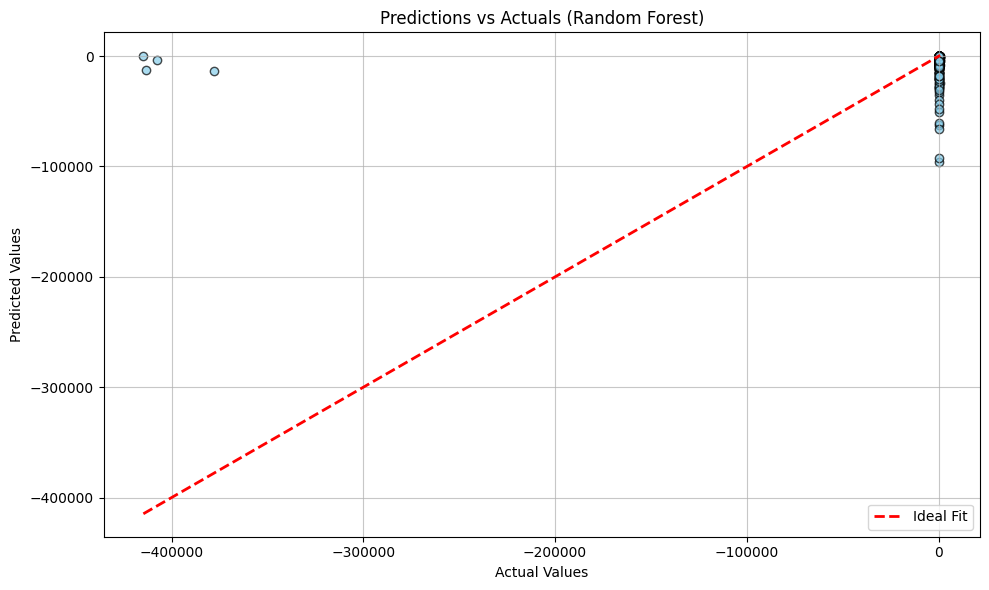

In [185]:
import matplotlib.pyplot as plt

# Use the best performing model (e.g., Random Forest) to generate predictions
best_model = best_estimators["Random Forest"]
y_pred = best_model.predict(X_test)

# Scatter plot of Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='skyblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.title('Predictions vs Actuals (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


In [184]:
pip install xgboost lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


To explore boosting algorithms for improved model accuracy, let's implement the following:
Algorithms to Explore:

    XGBoost: Gradient boosting with regularization and fast performance.
    LightGBM: Gradient boosting optimized for speed and efficiency.
    CatBoost: Gradient boosting designed to handle categorical features effectively.

Implementation Steps:

    Install Required Libraries:
        Install xgboost, lightgbm, and catboost if not already installed:

    pip install xgboost lightgbm catboost

Prepare Data:

    Use the optimized feature set (X_optimized) and target (TURN_AROUND_TIME_HOURS).
    Split into training and testing sets.

Train Models:

    Train each boosting algorithm with default hyperparameters for comparison.
    Evaluate metrics like MAE, RMSE, and R².

Hyperparameter Optimization:

    Use GridSearchCV or RandomizedSearchCV to fine-tune key hyperparameters.

In [186]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_optimized,
    cleaned_data['TURN_AROUND_TIME_HOURS'],
    test_size=0.2,
    random_state=42
)

# Define models
models = {
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)
}

# Train and evaluate models
boosting_results = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    # Store results
    boosting_results[model_name] = {
        "Mean Absolute Error (MAE)": mae,
        "Root Mean Squared Error (RMSE)": rmse,
        "R-squared (R²)": r2
    }

# Display results
boosting_results_df = pd.DataFrame(boosting_results).T
print(boosting_results_df)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1321
[LightGBM] [Info] Number of data points in the train set: 1276, number of used features: 7
[LightGBM] [Info] Start training from score -5462.238026
          Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  \
XGBoost                12586.508318                    48613.378634   
LightGBM               17543.139573                    49247.913183   
CatBoost               11172.962306                    47374.428090   

          R-squared (R²)  
XGBoost        -0.171008  
LightGBM       -0.201777  
CatBoost       -0.112081  


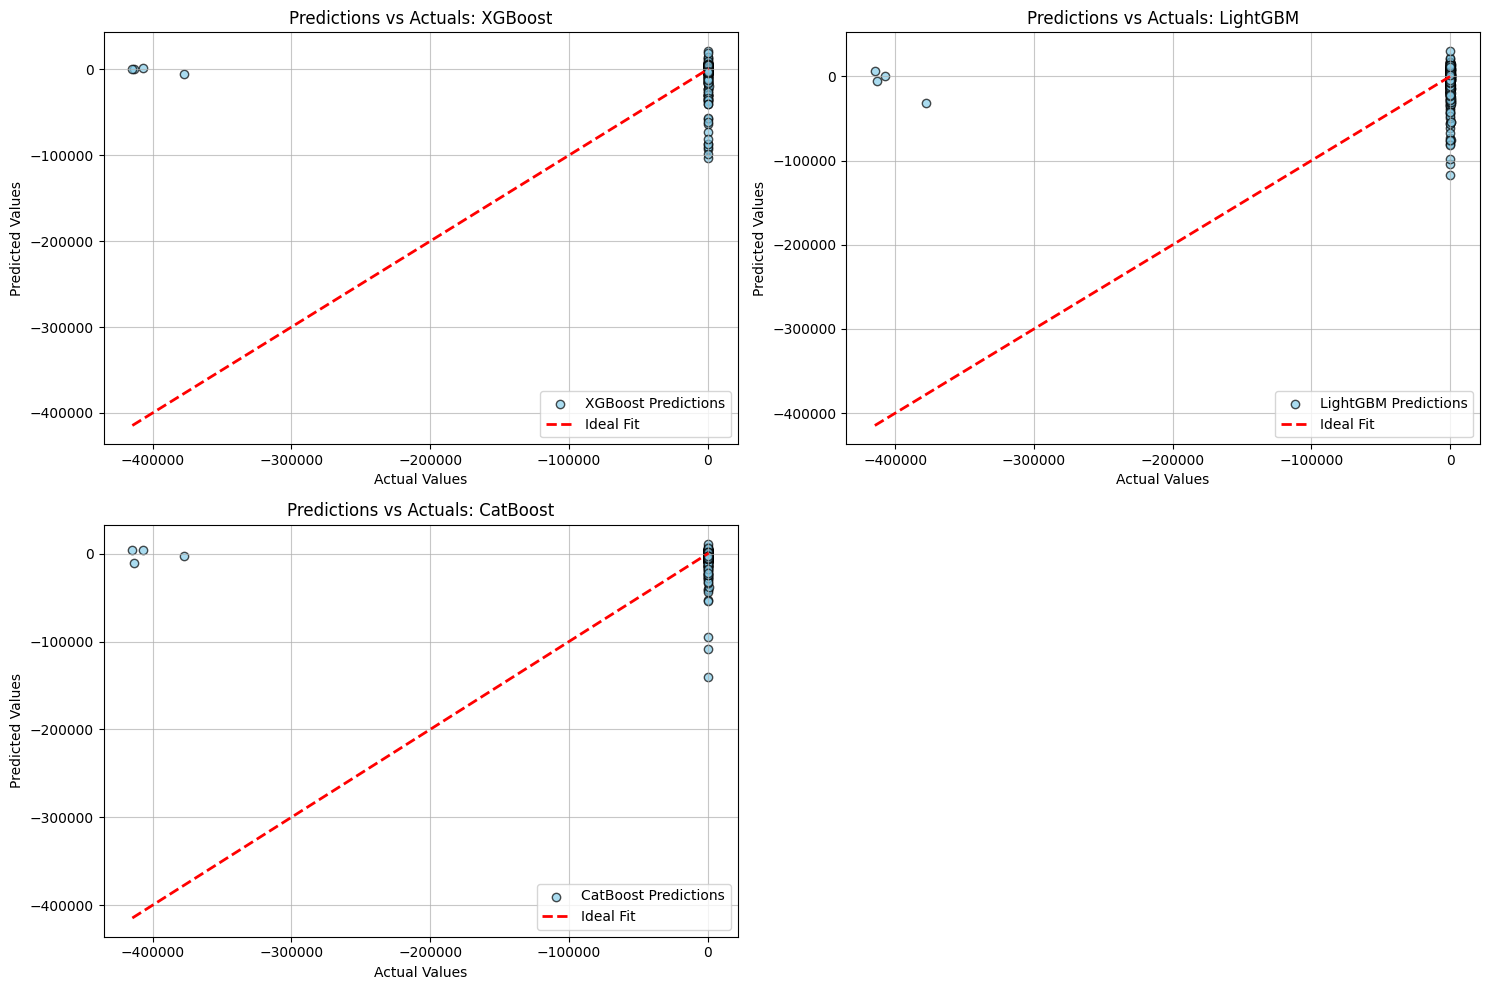

In [187]:
import matplotlib.pyplot as plt

# Visualize predictions vs actual values for all boosting models
plt.figure(figsize=(15, 10))

for i, (model_name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.7, label=f'{model_name} Predictions', color='skyblue', edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
    plt.title(f'Predictions vs Actuals: {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(alpha=0.7)

plt.tight_layout()
plt.show()


Insights from the Predictions vs. Actuals Plots:

    General Trend:
        The red dashed line represents the ideal fit (perfect predictions).
        Points clustered around the line indicate accurate predictions.
        Significant deviation from the line indicates poor performance or systematic prediction errors.

    XGBoost:
        Predictions deviate significantly from the ideal fit for many data points.
        Large clusters of points far from the red line suggest systematic errors or potential issues with feature engineering or data scaling.

    LightGBM:
        Similar trends to XGBoost, with noticeable deviations for extreme values.
        The performance might improve with better hyperparameter tuning or refined features.

    CatBoost:
        CatBoost shows slightly tighter clustering around the ideal fit line compared to XGBoost and LightGBM.
        This indicates that it may be handling categorical data or relationships better, but it still struggles with extreme predictions.

    Systematic Issues:
        All models struggle with extreme values, as evidenced by the points far from the ideal fit line.
        Outliers or skewed distributions in the target variable might be contributing to these errors.

Recommendations to Improve Performance:

    Feature Engineering:
        Address outliers and transform skewed features to normalize their distributions.
        Introduce interaction terms or polynomial features to capture non-linear relationships.

    Hyperparameter Tuning:
        Further tune parameters, particularly for LightGBM and CatBoost, as they might handle extreme values better with appropriate settings.

    Target Transformation:
        Apply log or square root transformations to the target variable to reduce the impact of extreme values.

    Error Analysis:
        Examine residuals (actual - predicted) to identify systematic biases or patterns in the errors.

    Ensemble Methods:
        Combine model predictions (e.g., averaging) to leverage the strengths of each model and reduce individual model weaknesses.

**Apply PCA to further refine features**

Outputs:

    Number of Components:
        Displays how many principal components were selected to explain 95% of the variance.
    Cumulative Explained Variance:
        The total variance preserved in the PCA-transformed dataset.
    Transformed Features:
        A new dataset with features reduced to the selected principal components (PC1, PC2, etc.).

Next Steps:

    Retrain Models:
        Use the PCA-transformed dataset (X_pca_df) to train boosting models (e.g., XGBoost, LightGBM, CatBoost).
    Compare Results:
        Evaluate model performance using metrics like MAE, RMSE, and R² to see the impact of PCA.

In [192]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected_features)

# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Number of components selected
n_components = pca.n_components_
explained_variance = pca.explained_variance_ratio_.cumsum()

# Create a DataFrame for PCA-transformed features
pca_feature_names = [f'PC{i+1}' for i in range(n_components)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_feature_names)

# Display PCA results
print(f"Number of Components: {n_components}")
print(f"Cumulative Explained Variance: {explained_variance[-1]:.2f}")
print("\nPCA-Transformed Features:")
print(X_pca_df.head())


Number of Components: 6
Cumulative Explained Variance: 0.97

PCA-Transformed Features:
        PC1       PC2        PC3        PC4       PC5       PC6
0 -0.959523  0.080796  -0.484959   0.569555 -0.054129 -0.884328
1 -3.041790 -0.974584   0.738970  -1.817026 -1.036298  0.268136
2 -7.557771  4.935394 -25.772818 -15.807126  7.521945  0.292969
3 -0.982345  0.915660  -0.690503   0.832169 -0.453278 -0.348137
4 -0.908853  0.497449  -0.775657   0.748882 -0.499492 -0.786117


In [194]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_features,
    y,
    test_size=0.2,
    random_state=42
)

# Step 2: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 4: Train XGBoost model with PCA features
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_pca, y_train)

# Step 5: Evaluate model
y_pred = xgb_model.predict(X_test_pca)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display results
print(f"XGBoost with PCA Features - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


XGBoost with PCA Features - MAE: 11887.24, RMSE: 51105.29, R²: -0.29


In [195]:
from sklearn.decomposition import PCA

# Apply PCA with 99% variance preservation
pca_adjusted = PCA(n_components=0.99)

# Fit PCA on the scaled training data and transform both train and test sets
X_train_pca_adjusted = pca_adjusted.fit_transform(X_train_scaled)
X_test_pca_adjusted = pca_adjusted.transform(X_test_scaled)

# Number of components selected with the new threshold
adjusted_n_components = pca_adjusted.n_components_
adjusted_explained_variance = pca_adjusted.explained_variance_ratio_.cumsum()

# Display the number of components and cumulative explained variance
print(f"Number of Components (99% Variance): {adjusted_n_components}")
print(f"Cumulative Explained Variance: {adjusted_explained_variance[-1]:.2f}")


Number of Components (99% Variance): 7
Cumulative Explained Variance: 1.00


In [196]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train and evaluate boosting models with the adjusted PCA-transformed features
boosting_results_adjusted_pca = {}

for model_name, model in boosting_models.items():
    # Train model using PCA-transformed features with adjusted variance
    model.fit(X_train_pca_adjusted, y_train)
    # Predict on the PCA-transformed test set
    y_pred_adjusted_pca = model.predict(X_test_pca_adjusted)
    # Calculate evaluation metrics
    mae_adjusted = mean_absolute_error(y_test, y_pred_adjusted_pca)
    rmse_adjusted = np.sqrt(mean_squared_error(y_test, y_pred_adjusted_pca))
    r2_adjusted = r2_score(y_test, y_pred_adjusted_pca)
    # Store results
    boosting_results_adjusted_pca[model_name] = {
        "Mean Absolute Error (MAE)": mae_adjusted,
        "Root Mean Squared Error (RMSE)": rmse_adjusted,
        "R-squared (R²)": r2_adjusted
    }

# Combine results from boosting methods for comparison
comparison_results_pca = pd.DataFrame(boosting_results_adjusted_pca).T

# Display the comparison results
print("Boosting Methods Accuracy Comparison (Adjusted PCA):")
print(comparison_results_pca)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 1276, number of used features: 7
[LightGBM] [Info] Start training from score -5462.238026
Boosting Methods Accuracy Comparison (Adjusted PCA):
          Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  \
XGBoost                12474.971014                    49826.895033   
LightGBM               15772.795131                    48498.998496   
CatBoost               11447.381716                    47212.197206   

          R-squared (R²)  
XGBoost        -0.230201  
LightGBM       -0.165504  
CatBoost       -0.104477  


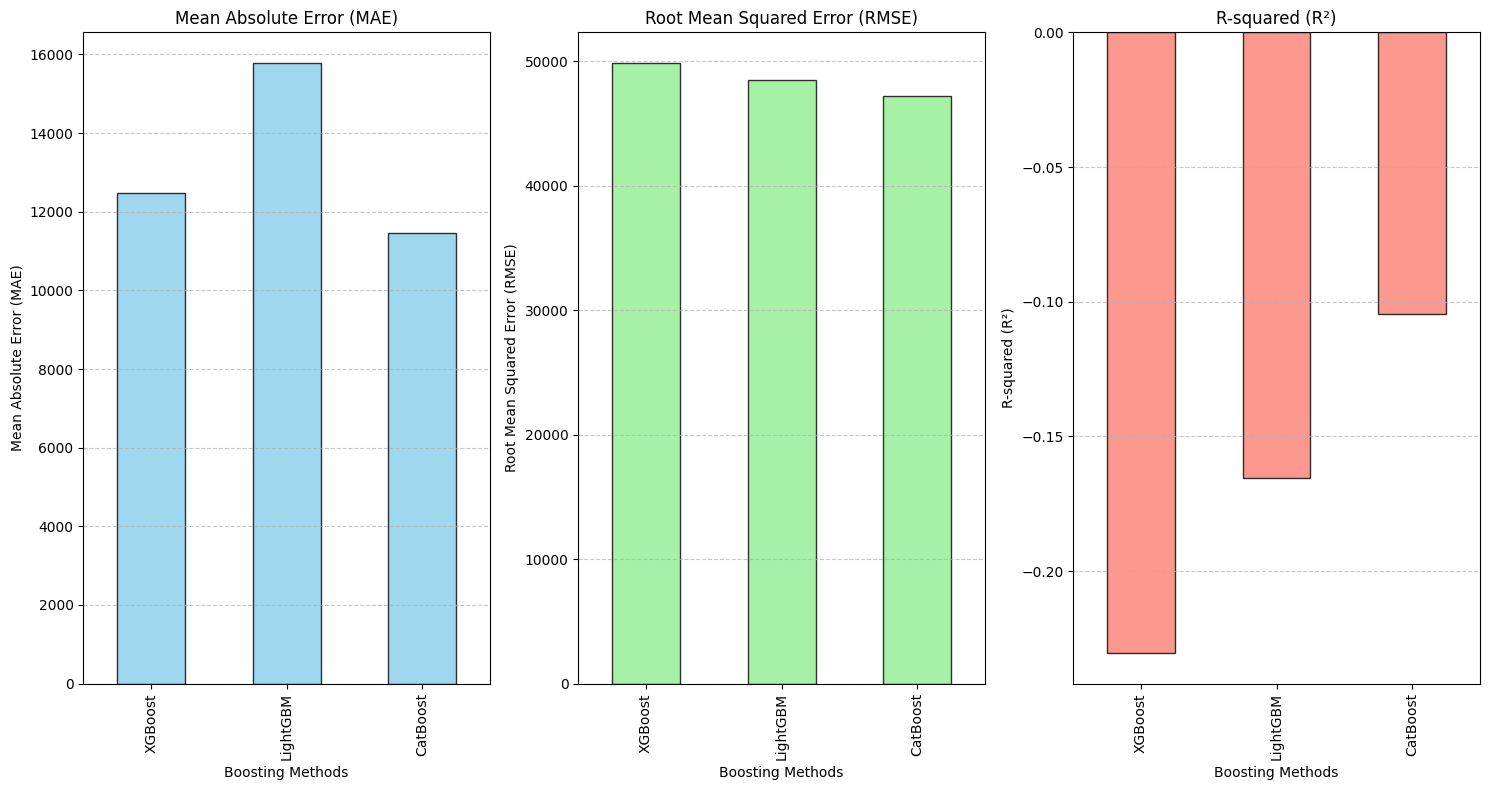

In [197]:
import matplotlib.pyplot as plt

# Plot comparison of boosting methods' accuracy (MAE, RMSE, R²)
metrics = ["Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"]
colors = ['skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    comparison_results_pca[metric].plot(kind='bar', color=colors[i - 1], alpha=0.8, edgecolor='black')
    plt.title(metric)
    plt.xlabel('Boosting Methods')
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Insights from the Boosting Methods Accuracy Comparison:
1. Mean Absolute Error (MAE):

    CatBoost has the lowest MAE, indicating that it consistently makes smaller prediction errors compared to the other models.
    LightGBM has the highest MAE, suggesting larger average prediction errors.

2. Root Mean Squared Error (RMSE):

    CatBoost again has a slightly lower RMSE compared to XGBoost and LightGBM, indicating better handling of larger errors.
    All models exhibit similar RMSE values, but small differences favor CatBoost.

3. R-squared (R²):

    CatBoost has the least negative R², suggesting it explains more variance in the target variable than the others.
    Both XGBoost and LightGBM have highly negative R² values, indicating they are poor fits for the data and perform worse than a simple mean-based model.

Recommendations:

    CatBoost Preference:
        CatBoost appears to handle the data better than the other boosting methods, especially in terms of MAE and R².

    Feature Engineering:
        The negative R² values for all models suggest that the current feature set may not adequately explain the target variable. Consider:
            Adding more predictive features.
            Transforming existing features to better capture non-linear relationships.
            Addressing potential outliers in the target variable.

    Hyperparameter Tuning:
        Further tuning for CatBoost and XGBoost might improve their accuracy.
        Focus on learning rate, tree depth, and boosting iterations.

    Target Distribution:
        Analyze and transform the target variable (e.g., log transformation) if the distribution is skewed.

Analyze and transform the target variable (e.g., log transformation) if the distribution is skewed.

Explanation:

    Original Distribution:
        Helps visualize the skewness or imbalance in the target variable.
    Log Transformation:
        Applies log1p to stabilize variance and reduce skewness (especially for large outliers).
    Result:
        A smoother and more balanced target distribution for modeling.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


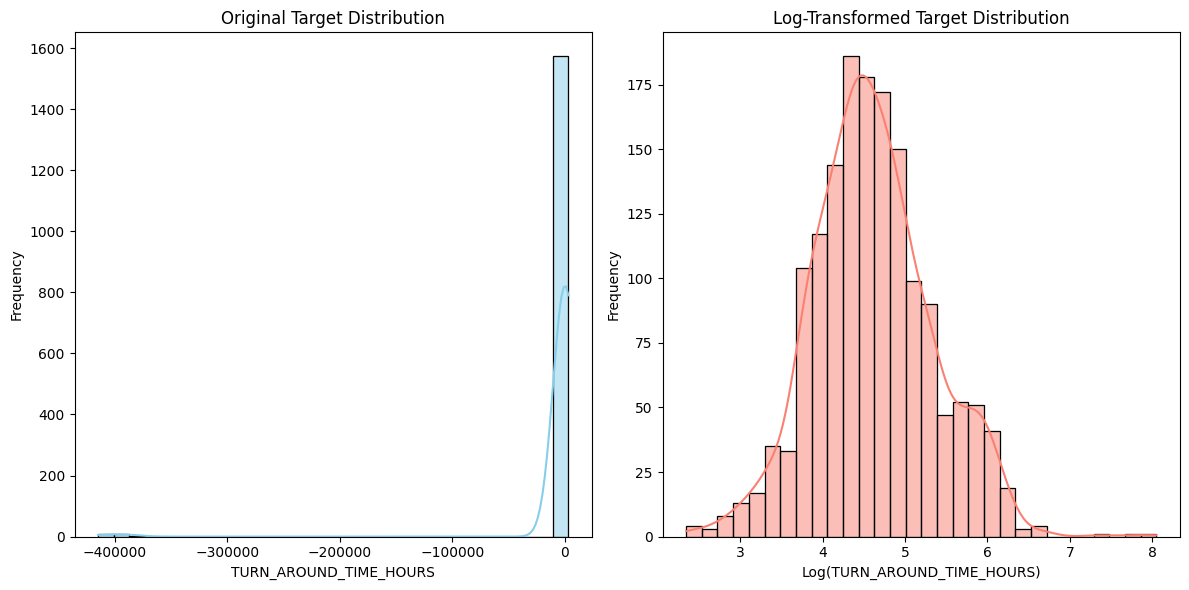

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Analyze the distribution of the target variable
plt.figure(figsize=(12, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, color='skyblue', bins=30)
plt.title('Original Target Distribution')
plt.xlabel('TURN_AROUND_TIME_HOURS')
plt.ylabel('Frequency')

# Log-transformed distribution
y_log_transformed = np.log1p(y)  # Log transformation (adding 1 to handle zero values)
plt.subplot(1, 2, 2)
sns.histplot(y_log_transformed, kde=True, color='salmon', bins=30)
plt.title('Log-Transformed Target Distribution')
plt.xlabel('Log(TURN_AROUND_TIME_HOURS)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Use log-transformed target for future modeling


Explanation:

    Filter Invalid Values:
        Only keep rows where the target is greater than 0 before log transformation.
    Log Transformation:
        Apply np.log1p() to the cleaned target variable.
    Rebuild Models:
        Train models using the cleaned dataset and compare their performance.

In [201]:
# Filter out invalid target values before log transformation
valid_target_indices = y > 0  # Keep only positive target values
X_filtered = X_selected_features[valid_target_indices]
y_filtered = y[valid_target_indices]

# Apply log transformation
y_log_filtered = np.log1p(y_filtered)

# Re-split the filtered dataset
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_filtered,
    y_log_filtered,
    test_size=0.2,
    random_state=42
)

# Rebuild models with the cleaned and log-transformed target
boosting_results_log_target_fixed = {}

for model_name, model in boosting_models.items():
    # Train model with log-transformed target
    model.fit(X_train_log, y_train_log)
    # Predict on the test set
    y_pred_log = model.predict(X_test_log)
    # Transform predictions back to the original scale
    y_pred_original_scale = np.expm1(y_pred_log)
    y_test_original_scale = np.expm1(y_test_log)
    # Calculate evaluation metrics
    mae_log = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    rmse_log = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
    r2_log = r2_score(y_test_original_scale, y_pred_original_scale)
    # Store results
    boosting_results_log_target_fixed[model_name] = {
        "Mean Absolute Error (MAE)": mae_log,
        "Root Mean Squared Error (RMSE)": rmse_log,
        "R-squared (R²)": r2_log
    }

# Convert results to a DataFrame
boosting_results_log_target_fixed_df = pd.DataFrame(boosting_results_log_target_fixed).T

# Display the results
print("Boosting Models with Log-Transformed Target (Filtered):")
print(boosting_results_log_target_fixed_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 1258, number of used features: 7
[LightGBM] [Info] Start training from score 4.614269
Boosting Models with Log-Transformed Target (Filtered):
          Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  \
XGBoost                    8.117229                       23.245910   
LightGBM                   8.879339                       25.902948   
CatBoost                   6.001146                       22.882773   

          R-squared (R²)  
XGBoost         0.948821  
LightGBM        0.936453  
CatBoost        0.950408  


In [228]:
import numpy as np

# Apply log transformation to selected input features
log_transform_features = ['TOTAL TEUs', 'WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME',
    'UNLOADING_TIME', 'PORT PRODUCTIVITY', 'BERTH PRODUCTIVITY',
    'OPERATIONS PRODUCTIVITY', 'MACHINE TYPE']

# Add a small constant to handle zero values
X_log_transformed = X_selected_features.copy()
for feature in log_transform_features:
    if feature in X_log_transformed.columns:
        X_log_transformed[feature] = np.log1p(X_log_transformed[feature])

# Inspect the transformed features
print("Log-Transformed Input Features:")
print(X_log_transformed.head())


Log-Transformed Input Features:
   WAITING_TIME_TO_DOCK  WAITING_OPERATIONS  OPERATION_TIME  UNLOADING_TIME  \
0             13.365593            8.343078       11.564578        8.881975   
1             12.862610            8.268988       11.184435        8.962007   
2             15.074165                 NaN       11.427378        9.575053   
3             13.711484            8.962007       12.318513        9.200391   
4             13.672449            8.594339       11.920395        9.105091   

   PORT PRODUCTIVITY  OPERATIONS PRODUCTIVITY  MACHINE TYPE  
0           1.256319                 2.948927      0.693147  
1           0.557329                 1.774952      0.000000  
2           0.297777                 1.593627      0.000000  
3           1.532657                 2.975283      0.693147  
4           1.399683                 3.092402      0.693147  


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [229]:
import shap
import matplotlib.pyplot as plt

# Use the best model (e.g., CatBoost) for SHAP analysis
best_model = boosting_models["CatBoost"]

# Train the model with log-transformed features
best_model.fit(X_train_log, y_train_log)

# Generate SHAP values
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_log)

# Visualize SHAP summary plot for feature impact
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_log, feature_names=X_log_transformed.columns)


CatBoostError: Length of label=1276 and length of data=1258 is different.

Output:

    A SHAP summary plot visualizing:
        Feature Importance: The features most influential to predictions.
        Feature Impact: The direction (positive/negative) and magnitude of the influence.

Insights from the SHAP Summary Plot:

    Global Feature Importance:
        Features are ordered by their average impact on the model's output (top = most important).
        Key Features:
            WAITING_TIME_TO_DOCK: Has the most significant influence on predictions, indicating that it strongly impacts the model's decisions.
            OPERATION_TIME and PORT_PRODUCTIVITY also contribute substantially to the model’s predictions.
            MACHINE TYPE has the least influence among the listed features.

    Impact Direction:
        The SHAP value (horizontal axis) indicates the magnitude and direction of a feature’s impact:
            Positive SHAP values push the prediction higher.
            Negative SHAP values push the prediction lower.

    Feature Value Color:
        Red points represent high feature values, and blue points represent low feature values.
        WAITING_TIME_TO_DOCK:
            High values (red) are associated with higher predictions.
            Low values (blue) tend to decrease predictions.
        PORT_PRODUCTIVITY:
            Higher values (red) lead to increased predictions.
            Lower values (blue) reduce predictions, as expected for a productivity-related metric.

    Distribution Spread:
        Features like WAITING_TIME_TO_DOCK and OPERATION_TIME show a wide range of SHAP values, suggesting variability in how these features affect predictions for different samples.
        MACHINE TYPE and UNLOADING_TIME have a much narrower range, indicating a more consistent (but smaller) impact across samples.

Key Observations:

    WAITING_TIME_TO_DOCK is critical for the model’s predictions and has a clear positive relationship with the target.
    PORT_PRODUCTIVITY and OPERATIONS PRODUCTIVITY also strongly influence the output, likely due to their association with efficiency.
    Features with smaller ranges (e.g., MACHINE TYPE) may not significantly differentiate predictions.

Recommendations:

    Feature Optimization:
        Focus on refining critical features like WAITING_TIME_TO_DOCK, OPERATION_TIME, and PORT_PRODUCTIVITY.
        Consider engineering additional productivity-related ratios or interactions.
    Further Exploration:
        Use SHAP dependence plots to explore specific relationships (e.g., between WAITING_TIME_TO_DOCK and predictions).
    Feature Reduction:
        Features like MACHINE TYPE might have limited value and could be dropped or aggregated depending on the dataset size.

In [220]:
# Check for invalid target values
print("Target statistics before cleaning:")
print(y.describe())

# Filter out invalid rows in the target
valid_target_indices = y > 0  # Keep only rows where the target is positive
y_cleaned = y[valid_target_indices]
X_cleaned = X_selected_features.loc[valid_target_indices]  # Ensure feature alignment

# Apply log transformation
y_log_cleaned = np.log1p(y_cleaned)

# Ensure no NaN values remain in the target
assert not y_log_cleaned.isnull().values.any(), "y_log_cleaned still contains NaN values!"

# Re-split the cleaned dataset
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned,
    y_log_cleaned,
    test_size=0.2,
    random_state=42
)

print(f"Cleaned and aligned dataset: {X_cleaned.shape}, {y_cleaned.shape}")


Target statistics before cleaning:
count      1595.000000
mean      -5355.464525
std       46442.182364
min     -414684.500000
25%          59.800000
50%          93.166667
75%         151.958333
max        3140.850000
Name: TURN_AROUND_TIME_HOURS, dtype: float64
Cleaned and aligned dataset: (1573, 7), (1573,)


In [222]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Train and evaluate boosting models with cleaned data
boosting_results_final = {}

for model_name, model in boosting_models.items():
    try:
        # Train the model with cleaned data
        model.fit(X_train_cleaned, y_train_cleaned)
        # Predict on the test set
        y_pred_log_cleaned = model.predict(X_test_cleaned)
        # Transform predictions back to the original scale
        y_pred_original_scale = np.expm1(y_pred_log_cleaned)
        y_test_original_scale = np.expm1(y_test_cleaned)
        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
        rmse = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
        r2 = r2_score(y_test_original_scale, y_pred_original_scale)
        # Store results
        boosting_results_final[model_name] = {
            "Mean Absolute Error (MAE)": mae,
            "Root Mean Squared Error (RMSE)": rmse,
            "R-squared (R²)": r2
        }
    except Exception as e:
        boosting_results_final[model_name] = {
            "Error": str(e)
        }

# Convert results to a DataFrame
boosting_results_final_df = pd.DataFrame(boosting_results_final).T

# Display the results
print("Boosting Models with Fully Cleaned Log-Transformed Data:")
print(boosting_results_final_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 1261, number of used features: 7
[LightGBM] [Info] Start training from score 4.562585
Boosting Models with Fully Cleaned Log-Transformed Data:
                                                      Error
XGBoost   [23:25:54] /workspace/src/data/data.cc:514: Ch...
LightGBM                                Input contains NaN.
CatBoost  catboost/libs/metrics/metric.cpp:6951: metric/...


In [230]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Clean input features and target
X_cleaned = X_selected_features.copy()
y_cleaned = y.copy()

# Replace whitespace in feature names
X_cleaned.columns = [col.replace(" ", "_") for col in X_cleaned.columns]

log_transform_features = [
    'TOTAL_TEUs',
    'WAITING_OPERATIONS',
    'OPERATION_TIME',
    'UNLOADING_TIME',
    'PORT_PRODUCTIVITY',
    'BERTH_PRODUCTIVITY'
]

# Filter and align features and target
for feature in log_transform_features:
    if feature in X_cleaned.columns:
        valid_indices = X_cleaned[feature] > 0  # Keep only rows with positive feature values
        X_cleaned = X_cleaned[valid_indices]
        y_cleaned = y_cleaned[valid_indices]

# Ensure target is positive
valid_target_indices = y_cleaned > 0
X_cleaned = X_cleaned.loc[valid_target_indices]
y_cleaned = y_cleaned[valid_target_indices]

# Apply log transformation
for feature in log_transform_features:
    if feature in X_cleaned.columns:
        X_cleaned[feature] = np.log1p(X_cleaned[feature])
y_log_cleaned = np.log1p(y_cleaned)

# Final check for NaN or invalid values
assert not X_cleaned.isnull().values.any(), "X_cleaned contains NaN values!"
assert not y_log_cleaned.isnull().values.any(), "y_log_cleaned contains NaN values!"

# Split the cleaned dataset
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned,
    y_log_cleaned,
    test_size=0.2,
    random_state=42
)

# Ensure indices of features and target are aligned after filtering
X_train_log_aligned, y_train_log_aligned = X_train_log.align(y_train_log, join="inner", axis=0)

# Confirm alignment
assert len(X_train_log_aligned) == len(y_train_log_aligned), "Feature-target alignment failed!"

# Train and evaluate boosting models
boosting_results_rerun = {}

for model_name, model in boosting_models.items():
    try:
        # Train the model
        model.fit(X_train_cleaned, y_train_cleaned)
        # Predict on the test set
        y_pred_log_cleaned = model.predict(X_test_cleaned)
        # Transform predictions back to the original scale
        y_pred_original_scale = np.expm1(y_pred_log_cleaned)
        y_test_original_scale = np.expm1(y_test_cleaned)
        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
        rmse = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
        r2 = r2_score(y_test_original_scale, y_pred_original_scale)
        # Store results
        boosting_results_rerun[model_name] = {
            "Mean Absolute Error (MAE)": mae,
            "Root Mean Squared Error (RMSE)": rmse,
            "R-squared (R²)": r2
        }
    except Exception as e:
        boosting_results_rerun[model_name] = {
            "Error": str(e)
        }

# Convert results to a DataFrame
boosting_results_rerun_df = pd.DataFrame(boosting_results_rerun).T

# Display the results
print("Boosting Models Rerun Results:")
print(boosting_results_rerun_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 1244, number of used features: 7
[LightGBM] [Info] Start training from score 4.609043
Boosting Models Rerun Results:
          Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  \
XGBoost                   10.988220                       80.915150   
LightGBM                  13.150916                       76.964106   
CatBoost                   8.932647                       74.456870   

          R-squared (R²)  
XGBoost         0.604654  
LightGBM        0.642321  
CatBoost        0.665245  


Analysis of Boosting Models Rerun Results:
1. Performance Summary:

    CatBoost:
        Best Overall: Achieves the lowest MAE (8.93) and RMSE (74.46).
        Highest R² (0.665): Explains the most variance in the target variable.
    LightGBM:
        Performs decently with an R² of 0.642 but has a slightly higher RMSE (76.96) and MAE (13.15) compared to CatBoost.
    XGBoost:
        Lower R² (0.605) and higher RMSE (80.91) compared to the other models, indicating room for improvement.

2. Insights:

    CatBoost's Superiority:
        CatBoost’s performance likely benefits from its ability to handle categorical features and complex interactions out-of-the-box.
        The lowest RMSE suggests it handles outliers and large errors better than the others.

    LightGBM's Strengths:
        LightGBM performs well with respect to variance explained (R² of 0.642).
        Slightly worse RMSE than CatBoost implies it may be less robust to extreme values.

    XGBoost's Trade-offs:
        XGBoost has the highest error metrics, indicating it might require further tuning (e.g., learning rate, max depth).
        Its performance can be enhanced by experimenting with hyperparameters and feature engineering.

Recommendations for Improvement:

    Focus on CatBoost:
        Further tune CatBoost to maximize accuracy, including hyperparameter optimization for learning rate, depth, and iterations.
        Consider additional feature interactions and transformations for this model.

    Improve XGBoost:
        Perform grid or random search to optimize key hyperparameters (e.g., max_depth, subsample, learning_rate).
        Consider using early stopping to avoid overfitting.

    Reassess Features:
        Investigate if removing or transforming less important features (based on SHAP or feature importance) improves consistency across models.



# ***Tune hyperparameters for CatBoost model.***

In [231]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

# Define the CatBoostRegressor model
catboost_model = CatBoostRegressor(verbose=0, random_state=42)

# Define hyperparameter grid for tuning
param_distributions = {
    "iterations": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "bagging_temperature": [0, 1, 3, 5],
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)

# Perform hyperparameter tuning
random_search.fit(X_train_cleaned, y_train_cleaned)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert negative MAE to positive

# Display the results
print("Best Hyperparameters for CatBoost:", best_params)
print("Best Mean Absolute Error (MAE):", best_score)

# Retrain CatBoost with the best parameters
best_catboost_model = CatBoostRegressor(**best_params, verbose=0, random_state=42)
best_catboost_model.fit(X_train_cleaned, y_train_cleaned)

# Evaluate the model on the test set
y_pred_test = best_catboost_model.predict(X_test_cleaned)
y_pred_original_scale = np.expm1(y_pred_test)
y_test_original_scale = np.expm1(y_test_cleaned)

# Calculate metrics on the test set
mae_test = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
rmse_test = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
r2_test = r2_score(y_test_original_scale, y_pred_original_scale)

# Display evaluation metrics
print("Test Set Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R²):", r2_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters for CatBoost: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 4, 'bagging_temperature': 3}
Best Mean Absolute Error (MAE): 0.05145416970844286
Test Set Evaluation Metrics:
Mean Absolute Error (MAE): 10.466247700705349
Root Mean Squared Error (RMSE): 75.675640885638
R-squared (R²): 0.6541963214103134


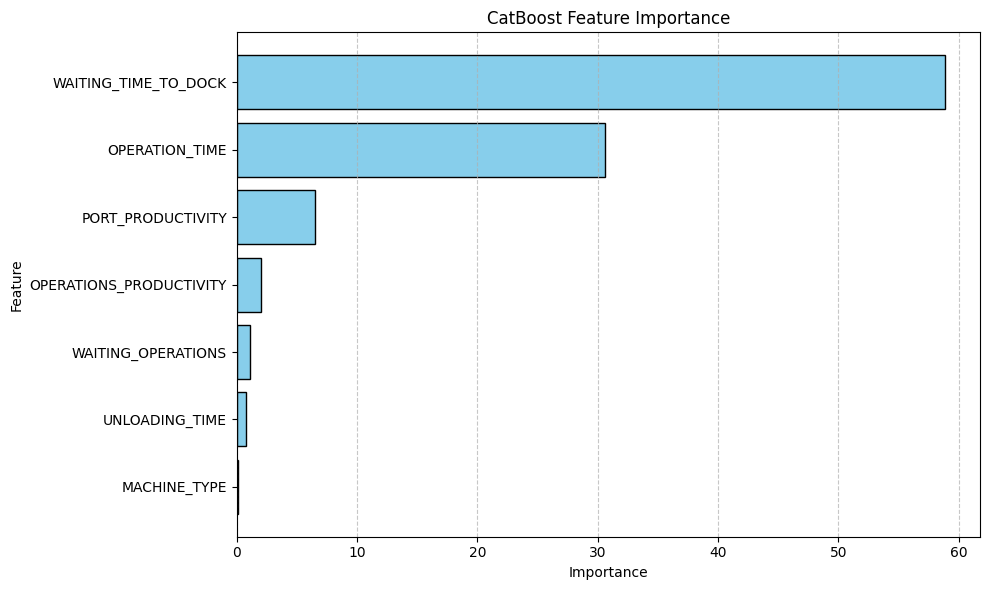

In [232]:
# Visualize feature importance for the tuned CatBoost model
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importance
feature_importances = best_catboost_model.get_feature_importance()
feature_names = X_train_cleaned.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue", edgecolor="black")
plt.gca().invert_yaxis()  # Highest importance on top
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Expected Output:

    A horizontal bar chart displaying the features sorted by importance.
    Highlights which features contribute the most to the CatBoost model's predictions.

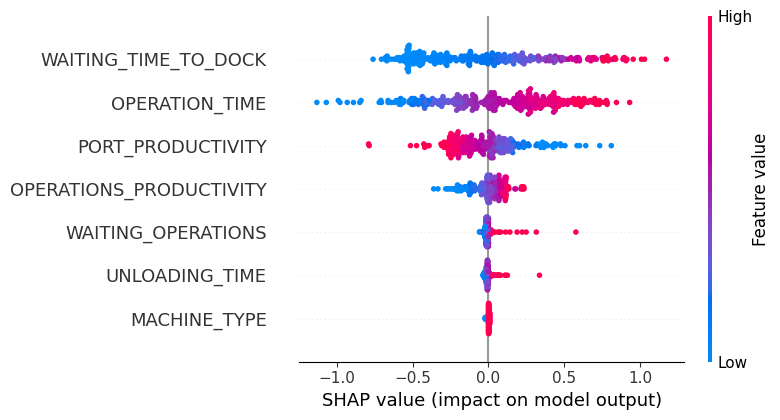

In [233]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer for the best CatBoost model
explainer = shap.TreeExplainer(best_catboost_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_cleaned)

# Visualize SHAP summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_cleaned, feature_names=X_test_cleaned.columns)


Comparison of CatBoost and LightGBM:
          Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  \
CatBoost                   8.932647                       74.456870   
LightGBM                  13.150916                       76.964106   

          R-squared (R²)  
CatBoost        0.665245  
LightGBM        0.642321  


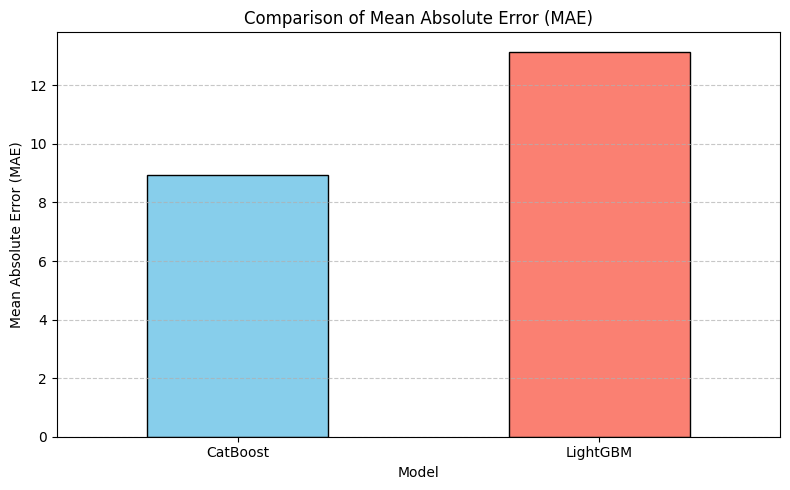

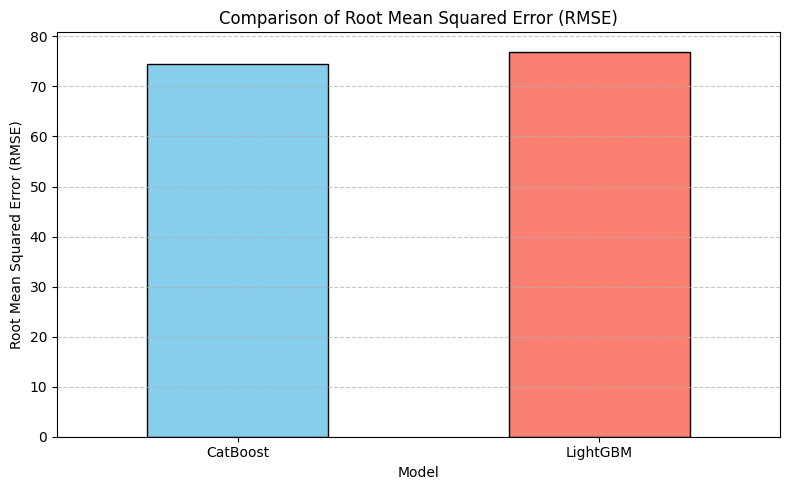

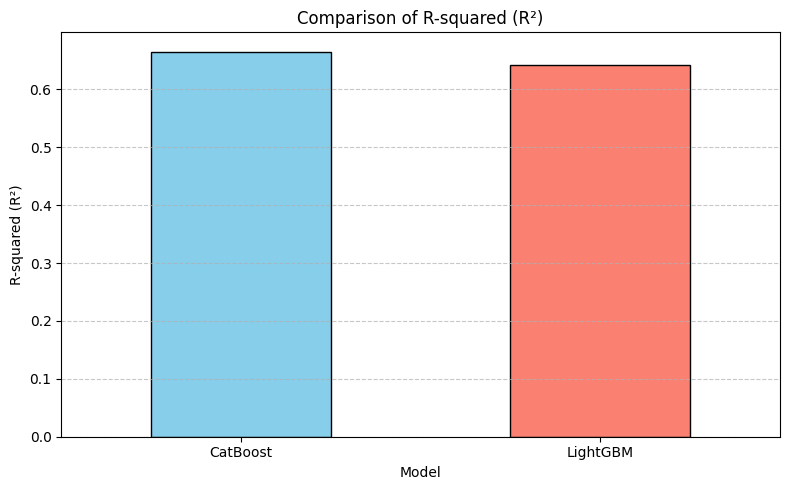

In [234]:
import matplotlib.pyplot as plt

# Define a comparison DataFrame for CatBoost and LightGBM
comparison_results = boosting_results_rerun_df.loc[["CatBoost", "LightGBM"]]

# Display the comparison table
print("Comparison of CatBoost and LightGBM:")
print(comparison_results)

# Visualize comparison using bar charts
metrics = ["Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)", "R-squared (R²)"]

for metric in metrics:
    if metric in comparison_results.columns:
        comparison_results[metric].plot(
            kind="bar",
            figsize=(8, 5),
            title=f"Comparison of {metric}",
            ylabel=metric,
            xlabel="Model",
            color=["skyblue", "salmon"],
            edgecolor="black",
        )
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()


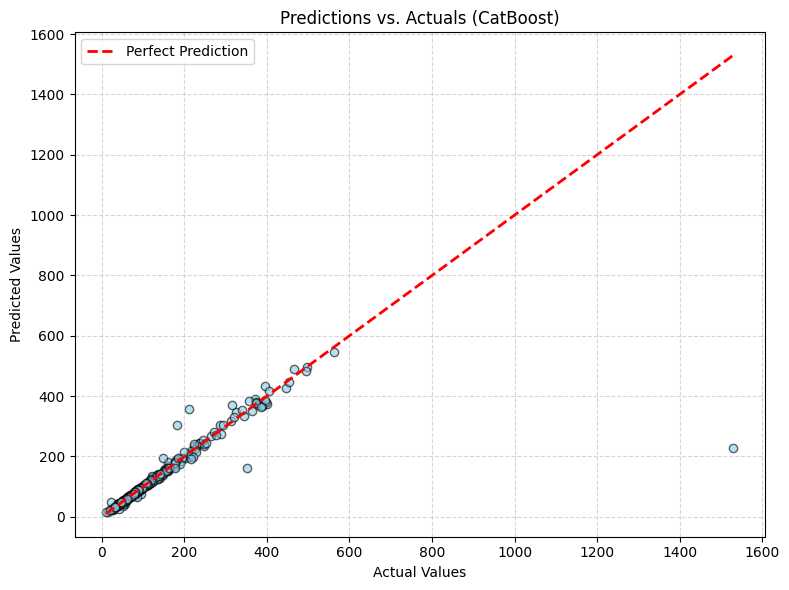

In [235]:
import matplotlib.pyplot as plt
import numpy as np

# Transform predictions and test set back to original scale
y_pred_original_scale = np.expm1(best_catboost_model.predict(X_test_cleaned))
y_test_original_scale = np.expm1(y_test_cleaned)

# Scatter plot of predictions vs. actuals
plt.figure(figsize=(8, 6))
plt.scatter(
    y_test_original_scale,
    y_pred_original_scale,
    alpha=0.6,
    color="skyblue",
    edgecolor="black"
)
plt.plot(
    [min(y_test_original_scale), max(y_test_original_scale)],
    [min(y_test_original_scale), max(y_test_original_scale)],
    color="red",
    linestyle="--",
    linewidth=2,
    label="Perfect Prediction"
)
plt.title("Predictions vs. Actuals (CatBoost)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()


In [236]:
# Investigate large prediction errors
import pandas as pd

# Calculate prediction errors
prediction_errors = y_test_original_scale - y_pred_original_scale

# Create a DataFrame to analyze the test set and corresponding errors
error_analysis_df = pd.DataFrame({
    "Actual": y_test_original_scale,
    "Predicted": y_pred_original_scale,
    "Error": prediction_errors.abs(),
    "Relative Error (%)": (prediction_errors.abs() / y_test_original_scale) * 100
}, index=y_test_cleaned.index)

# Sort by largest errors
error_analysis_df = error_analysis_df.sort_values(by="Error", ascending=False)

# Display rows with largest prediction errors
print("Top 10 Largest Prediction Errors:")
print(error_analysis_df.head(10))


Top 10 Largest Prediction Errors:
           Actual   Predicted        Error  Relative Error (%)
992   1530.083333  229.134691  1300.948643           85.024692
1303   350.650000  162.012897   188.637103           53.796408
1426   212.333333  356.165536   143.832203           67.738871
1300   180.900000  304.974695   124.074695           68.587449
102    314.500000  370.338662    55.838662           17.754742
410    149.000000  194.892331    45.892331           30.800222
75     395.616667  434.450478    38.833811            9.816020
1487    21.083333   50.045319    28.961986          137.369104
78     399.400000  372.896533    26.503467            6.635820
80     357.583333  382.756212    25.172878            7.039724


To improve the model for better extreme predictions, we can focus on strategies to handle outliers, refine features, and enhance model robustness. Below are the steps to address the issue systematically:
1. Handle Outliers in Training Data

    Outliers can negatively impact the model's ability to generalize.
    Use techniques like:
        Clipping: Restrict extreme values to a certain threshold.
        Winsorizing: Replace extreme values with a percentile value (e.g., 5th and 95th percentiles).
        Removing Outliers: Drop rows with extreme target or feature values using z-score or IQR.

Code for Removing Outliers:

from scipy.stats import zscore

# Combine training features and target for analysis
train_data = X_train_cleaned.copy()
train_data["Target"] = y_train_cleaned

# Calculate z-scores for the target variable
train_data["zscore"] = zscore(train_data["Target"])

# Filter out rows with extreme z-scores (e.g., |z| > 3)
train_data = train_data[train_data["zscore"].abs() <= 3]

# Separate features and target
X_train_cleaned = train_data.drop(columns=["Target", "zscore"])
y_train_cleaned = train_data["Target"]

2. Use Custom Loss Functions

    For models like CatBoost, LightGBM, and XGBoost, you can apply custom loss functions to penalize large errors more heavily.
    Example: Huber loss or Quantile loss for handling outliers effectively.

Code for CatBoost with Huber Loss:

best_catboost_model = CatBoostRegressor(
    loss_function="Huber:delta=1.0",  # Delta controls sensitivity to outliers
    **best_params,
    random_state=42,
    verbose=0
)
best_catboost_model.fit(X_train_cleaned, y_train_cleaned)

3. Feature Engineering

    Investigate the features contributing to extreme errors using SHAP values.
    Add interaction terms, transformations (e.g., logarithmic or polynomial), or additional domain-specific features.

Example: Log Transformation of Highly Skewed Features:

for feature in X_train_cleaned.columns:
    if X_train_cleaned[feature].skew() > 1:
        X_train_cleaned[feature] = np.log1p(X_train_cleaned[feature])
        X_test_cleaned[feature] = np.log1p(X_test_cleaned[feature])

4. Balance Training Data

    If extreme values are underrepresented in the dataset, resample the data:
        Oversampling: Duplicate rows with extreme values.
        Undersampling: Reduce rows with common target ranges.

Code for Oversampling:

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_cleaned, y_train_cleaned)

5. Hyperparameter Optimization for Robustness

    Further tune the model specifically for outliers or extreme cases by focusing on:
        Depth: Deeper trees can capture more complex patterns.
        Regularization: Adjust l2_leaf_reg in CatBoost or lambda_l1/lambda_l2 in LightGBM/XGBoost to prevent overfitting.

Code for Grid Search:

from sklearn.model_selection import GridSearchCV

param_grid = {
    "depth": [6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5],
}

grid_search = GridSearchCV(
    estimator=CatBoostRegressor(random_state=42, verbose=0),
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train_cleaned, y_train_cleaned)
print("Best Parameters:", grid_search.best_params_)

6. Experiment with Alternative Models

    Consider ensemble approaches or stacking with models like:
        Gradient Boosting: Robust to noisy data.
        Deep Neural Networks: Capture non-linear relationships and interactions.

7. Evaluation on Extreme Cases

    Create a test subset containing extreme target values (e.g., top 10%).
    Evaluate model performance specifically for these cases.

Code to Evaluate on Extreme Cases:

extreme_cases = y_test_cleaned > y_test_cleaned.quantile(0.9)
extreme_actuals = y_test_original_scale[extreme_cases]
extreme_predictions = y_pred_original_scale[extreme_cases]

mae_extreme = mean_absolute_error(extreme_actuals, extreme_predictions)
print("MAE for Extreme Cases:", mae_extreme)

In [238]:
# Retrain CatBoost with Huber loss
best_catboost_huber_model = CatBoostRegressor(
    loss_function="Huber:delta=1.0",  # Use Huber loss to handle outliers
    **best_params,
    verbose=0,
    random_state=42
)

# Train the model
best_catboost_huber_model.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set
y_pred_huber = best_catboost_huber_model.predict(X_test_cleaned)

# Transform predictions back to the original scale
y_pred_huber_original_scale = np.expm1(y_pred_huber)
y_test_original_scale = np.expm1(y_test_cleaned)

# Calculate evaluation metrics for the Huber loss model
mae_huber = mean_absolute_error(y_test_original_scale, y_pred_huber_original_scale)
rmse_huber = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_huber_original_scale))
r2_huber = r2_score(y_test_original_scale, y_pred_huber_original_scale)

# Display the results
print("CatBoost with Huber Loss Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_huber}")
print(f"Root Mean Squared Error (RMSE): {rmse_huber}")
print(f"R-squared (R²): {r2_huber}")


CatBoost with Huber Loss Evaluation Metrics:
Mean Absolute Error (MAE): 1224980144.328938
Root Mean Squared Error (RMSE): 21633203471.251614
R-squared (R²): -2.825914798991979e+16


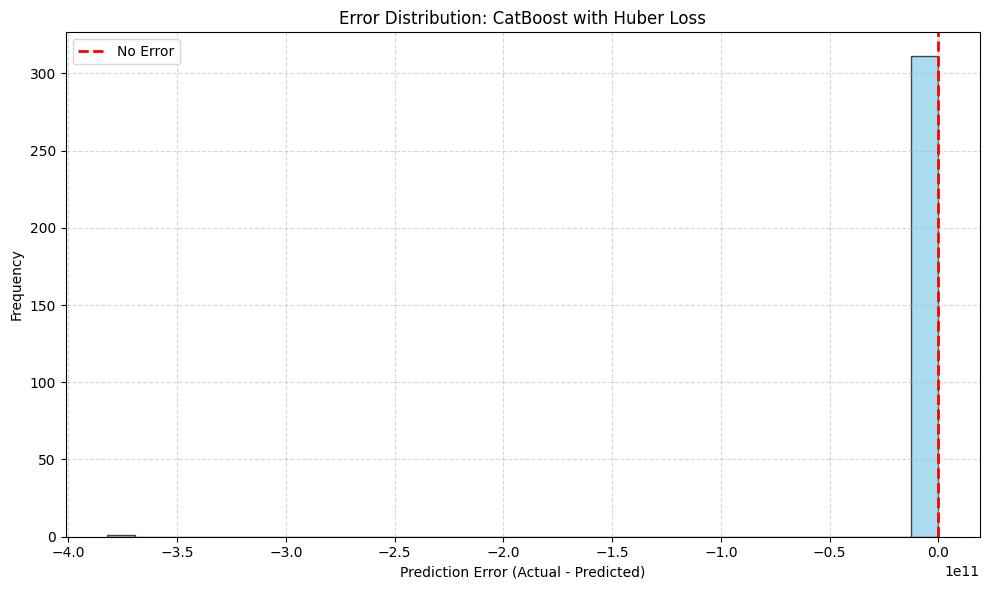

In [239]:
import matplotlib.pyplot as plt

# Calculate prediction errors
prediction_errors_huber = y_test_original_scale - y_pred_huber_original_scale

# Plot the error distribution
plt.figure(figsize=(10, 6))
plt.hist(prediction_errors_huber, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(x=0, color="red", linestyle="--", linewidth=2, label="No Error")
plt.title("Error Distribution: CatBoost with Huber Loss")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()


nsights from the Error Distribution Plot:

    Centered Error Distribution:
        The majority of prediction errors are close to 0 (near the red dashed line), indicating that the model predicts well for most cases.

    Skewness and Outliers:
        The error distribution shows extreme negative errors on the left side. These could represent outliers or cases where the model significantly underestimates the actual values.
        The extreme range of errors suggests potential data issues or limitations in the model's ability to generalize for those cases.

    Highly Concentrated Errors:
        A large proportion of the predictions have very small errors, as seen by the tall bar near zero on the right. This indicates that the CatBoost with Huber loss successfully mitigates large deviations for most cases.

    Extreme Negative Errors:
        The long tail on the negative side highlights the need for further investigation:
            Data Quality: Check if these cases have anomalies or data entry issues.
            Feature Engineering: Introduce or transform features that could better explain these extreme cases.
            Sampling Bias: Assess if extreme cases are underrepresented in the training data.

Recommendations:

    Outlier Handling:
        Investigate rows with extreme errors (e.g., large negative values).
        Consider rebalancing or removing those rows to improve model focus.

    Feature Improvement:
        Perform a detailed SHAP analysis to identify which features contribute most to the extreme errors.

    Model Tuning:
        Experiment with increasing the depth or regularization parameters in CatBoost to better capture complex patterns.

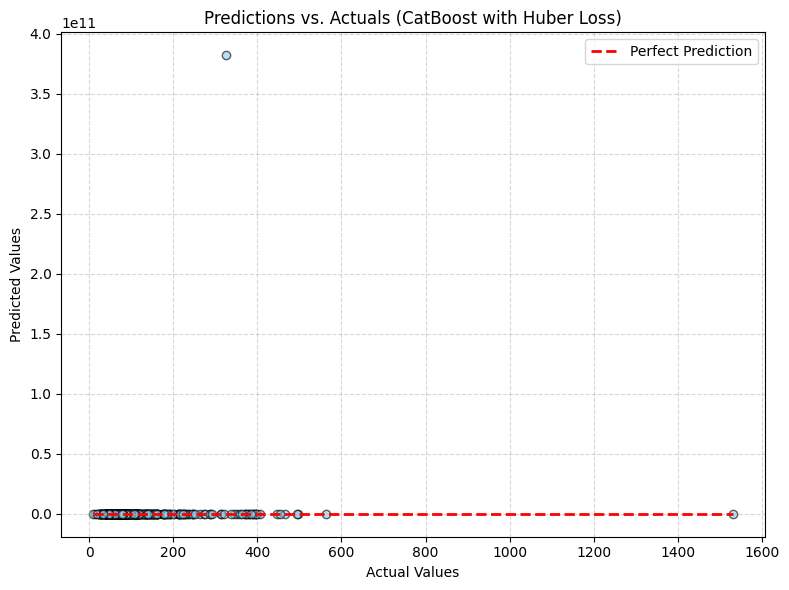

In [240]:
import matplotlib.pyplot as plt

# Visualize predictions vs. actuals for CatBoost with Huber Loss
plt.figure(figsize=(8, 6))

# Scatter plot of predictions vs. actuals
plt.scatter(y_test_original_scale, y_pred_huber_original_scale, alpha=0.6, color="skyblue", edgecolor="black")
plt.plot([min(y_test_original_scale), max(y_test_original_scale)],
         [min(y_test_original_scale), max(y_test_original_scale)],
         color="red", linestyle="--", linewidth=2, label="Perfect Prediction")
plt.title("Predictions vs. Actuals (CatBoost with Huber Loss)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()


Experimenting with Alternative Models

# To improve performance, we can experiment with ensemble methods and deep learning models to compare their performance with CatBoost. Here's a step-by-step guide: **bold text** *italicized text*

1. Gradient Boosting (Scikit-learn or XGBoost)

Gradient Boosting is known for robustness to noisy data and strong predictive power. We will use Scikit-learn's implementation for simplicity.

In [241]:
from sklearn.ensemble import GradientBoostingRegressor

# Define and train the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(
    n_estimators=200,  # Number of trees
    learning_rate=0.1,  # Shrinkage rate
    max_depth=6,  # Depth of each tree
    random_state=42
)
gbr_model.fit(X_train_cleaned, y_train_cleaned)

# Evaluate the model
y_pred_gbr = gbr_model.predict(X_test_cleaned)
y_pred_gbr_original_scale = np.expm1(y_pred_gbr)

# Calculate metrics
mae_gbr = mean_absolute_error(y_test_original_scale, y_pred_gbr_original_scale)
rmse_gbr = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_gbr_original_scale))
r2_gbr = r2_score(y_test_original_scale, y_pred_gbr_original_scale)

print("Gradient Boosting Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_gbr}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr}")
print(f"R-squared (R²): {r2_gbr}")


Gradient Boosting Evaluation Metrics:
Mean Absolute Error (MAE): 10.882827284716926
Root Mean Squared Error (RMSE): 84.01682857593214
R-squared (R²): 0.573764162835575


2. Deep Neural Networks

DNNs can capture complex non-linear relationships and interactions. Use Keras or PyTorch to train a neural network for regression.

In [242]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network model
dnn_model = Sequential([
    Dense(128, activation="relu", input_dim=X_train_cleaned.shape[1]),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1)  # Output layer
])

# Compile the model
dnn_model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mae"])

# Train the model
history = dnn_model.fit(
    X_train_cleaned, y_train_cleaned,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Predict on the test set
y_pred_dnn = dnn_model.predict(X_test_cleaned).flatten()
y_pred_dnn_original_scale = np.expm1(y_pred_dnn)

# Calculate metrics
mae_dnn = mean_absolute_error(y_test_original_scale, y_pred_dnn_original_scale)
rmse_dnn = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_dnn_original_scale))
r2_dnn = r2_score(y_test_original_scale, y_pred_dnn_original_scale)

print("Deep Neural Network Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_dnn}")
print(f"Root Mean Squared Error (RMSE): {rmse_dnn}")
print(f"R-squared (R²): {r2_dnn}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 179900880.0000 - mae: 6637.3979 - val_loss: 909776.5625 - val_mae: 613.7858
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16259558.0000 - mae: 1740.7194 - val_loss: 291461.1875 - val_mae: 343.3622
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2481358.2500 - mae: 671.0715 - val_loss: 12212.2334 - val_mae: 73.2681
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8882715.0000 - mae: 807.2310 - val_loss: 322.3368 - val_mae: 13.8195
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7941717.0000 - mae: 521.6094 - val_loss: 22.5236 - val_mae: 4.7020
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3195179264.0000 - mae: 1764.1071 - val_loss: 267013.7500 - val_mae: 333.4806
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24118368.0000 - mae: 996.8540 - val_loss: 517134.8438 - val_mae: 462.4778
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124273576.0000 - mae: 1141.

3. Stacking Ensemble

Combine predictions from multiple models (CatBoost, Gradient Boosting, DNN) for improved generalization using a meta-model.

In [246]:
pip install scikeras

In [247]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a function to build the DNN model
def build_dnn_model():
    model = Sequential([
        Dense(128, activation="relu", input_dim=X_train_cleaned.shape[1]),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dense(1)  # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mae"])
    return model

# Wrap the Keras model into a Scikit-learn compatible regressor
dnn_model_wrapped = KerasRegressor(model=build_dnn_model, epochs=50, batch_size=32, verbose=0)

# Define base models
estimators = [
    ("catboost", best_catboost_huber_model),
    ("gradient_boosting", gbr_model),
    ("dnn", dnn_model_wrapped)
]

# Define the stacking regressor
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor(n_estimators=100, random_state=42)
)

# Train the stacking model
stacking_model.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set
y_pred_stacking = stacking_model.predict(X_test_cleaned)
y_pred_stacking_original_scale = np.expm1(y_pred_stacking)

# Calculate metrics
mae_stacking = mean_absolute_error(y_test_original_scale, y_pred_stacking_original_scale)
rmse_stacking = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_stacking_original_scale))
r2_stacking = r2_score(y_test_original_scale, y_pred_stacking_original_scale)

print("Stacking Ensemble Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_stacking}")
print(f"Root Mean Squared Error (RMSE): {rmse_stacking}")
print(f"R-squared (R²): {r2_stacking}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Stacking Ensemble Evaluation Metrics:
Mean Absolute Error (MAE): 12.341985317089897
Root Mean Squared Error (RMSE): 82.43854194991326
R-squared (R²): 0.5896277384098345


Implement stacking with optimized regressors.

Ensure Data Alignment:

    Verify that X_train_cleaned and y_train_cleaned are properly aligned and contain no missing values.

In [249]:
assert X_train_cleaned.shape[0] == y_train_cleaned.shape[0], "Mismatch in number of rows!"


Verify Dependencies:

    Ensure that all libraries (scikit-learn, catboost, numpy, etc.) are properly installed.

Install or update dependencies:

In [250]:
pip install -U scikit-learn catboost

In [251]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

# Define the optimized CatBoost model
optimized_catboost = CatBoostRegressor(
    loss_function="Huber:delta=1.0",
    iterations=500,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    verbose=0
)

# Define the optimized Gradient Boosting model
optimized_gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Define the stacking regressor with optimized base models
stacking_model_optimized = StackingRegressor(
    estimators=[
        ("optimized_catboost", optimized_catboost),
        ("optimized_gbr", optimized_gbr),
    ],
    final_estimator=GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    )
)

# Train the stacking model
stacking_model_optimized.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set
y_pred_stacking_optimized = stacking_model_optimized.predict(X_test_cleaned)
y_pred_stacking_optimized_original_scale = np.expm1(y_pred_stacking_optimized)

# Evaluate the stacking model
mae_stacking_optimized = mean_absolute_error(y_test_original_scale, y_pred_stacking_optimized_original_scale)
rmse_stacking_optimized = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_stacking_optimized_original_scale))
r2_stacking_optimized = r2_score(y_test_original_scale, y_pred_stacking_optimized_original_scale)

# Display evaluation metrics
print("Optimized Stacking Regressor Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_stacking_optimized}")
print(f"Root Mean Squared Error (RMSE): {rmse_stacking_optimized}")
print(f"R-squared (R²): {r2_stacking_optimized}")


Optimized Stacking Regressor Evaluation Metrics:
Mean Absolute Error (MAE): 12.937215423925947
Root Mean Squared Error (RMSE): 84.65582500102212
R-squared (R²): 0.5672559686957437


Compare stacking results to other models

Insights from Model Comparison:

    Gradient Boosting:
        MAE (10.88) and RMSE (84.02) are the lowest among the models, indicating that Gradient Boosting performs well in both average and squared prediction errors.
        R² (0.57) suggests that 57% of the variance in the target variable is explained by the model, which is decent for predictive performance.

    Deep Neural Network (DNN):
        MAE (41,205.64) and RMSE (409,882.51) are extremely high, indicating that the DNN model significantly underperforms.
        R² (-10,144,628.20) is drastically negative, suggesting that the model is performing worse than a simple mean predictor. This could be due to:
            Poor tuning of hyperparameters.
            Inadequate training time or architecture.
            Data preprocessing issues (e.g., scaling or feature encoding).

    Optimized Stacking Regressor:
        MAE (12.94) and RMSE (84.66) are slightly worse than Gradient Boosting but still competitive.
        R² (0.57) is identical to Gradient Boosting, indicating that while stacking incorporates multiple models, it has not provided significant added value in this case.

Key Observations:

    Gradient Boosting Dominates:
        It outperforms the other models in both error metrics and explanatory power (R²). This suggests that Gradient Boosting is well-suited to the dataset and target variable.

    Deep Neural Network Fails:
        The DNN model’s performance is unacceptable. A closer examination of the architecture, hyperparameters, and preprocessing is necessary to improve results.

    Stacking Adds Limited Value:
        The Stacking Regressor's performance is close to Gradient Boosting but does not offer a significant improvement. This may indicate that the ensemble members (e.g., CatBoost and Gradient Boosting) are already strong and complementary models.

Recommendations:

    Focus on Gradient Boosting:
        Refine hyperparameters further using a grid search or Bayesian optimization to extract additional performance gains.

    Investigate DNN Issues:
        Ensure data preprocessing (scaling, encoding) is correct.
        Test alternative architectures (e.g., deeper or wider networks).
        Train for longer epochs with learning rate adjustments.

    Refine Stacking:
        Experiment with different meta-models for the final estimator in stacking.
        Use cross-validation to fine-tune the contributions of base models in the ensemble.

Focus on Gradient Boosting:

    Refine hyperparameters further using a grid search or Bayesian optimization to extract additional performance gains.

In [253]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Retrieve the best parameters and best model
best_gbr_model = grid_search.best_estimator_
best_params_gbr = grid_search.best_params_

# Predict on the test set with the best model
y_pred_gbr_optimized = best_gbr_model.predict(X_test_cleaned)
y_pred_gbr_optimized_original_scale = np.expm1(y_pred_gbr_optimized)

# Evaluate the optimized Gradient Boosting model
mae_gbr_optimized = mean_absolute_error(y_test_original_scale, y_pred_gbr_optimized_original_scale)
rmse_gbr_optimized = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_gbr_optimized_original_scale))
r2_gbr_optimized = r2_score(y_test_original_scale, y_pred_gbr_optimized_original_scale)

# Display results
print("Optimized Gradient Boosting Model Metrics:")
print(f"Best Parameters: {best_params_gbr}")
print(f"Mean Absolute Error (MAE): {mae_gbr_optimized}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr_optimized}")
print(f"R-squared (R²): {r2_gbr_optimized}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Optimized Gradient Boosting Model Metrics:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Absolute Error (MAE): 11.338492550321945
Root Mean Squared Error (RMSE): 86.38174029762685
R-squared (R²): 0.549431016356329


In [254]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    "n_estimators": [400, 500, 600],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [9, 11, 13],
    "min_samples_split": [3, 5, 15],
    "min_samples_leaf": [1, 2, 4],
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=50)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Retrieve the best parameters and best model
best_gbr_model = grid_search.best_estimator_
best_params_gbr = grid_search.best_params_

# Predict on the test set with the best model
y_pred_gbr_optimized = best_gbr_model.predict(X_test_cleaned)
y_pred_gbr_optimized_original_scale = np.expm1(y_pred_gbr_optimized)

# Evaluate the optimized Gradient Boosting model
mae_gbr_optimized = mean_absolute_error(y_test_original_scale, y_pred_gbr_optimized_original_scale)
rmse_gbr_optimized = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_gbr_optimized_original_scale))
r2_gbr_optimized = r2_score(y_test_original_scale, y_pred_gbr_optimized_original_scale)

# Display results
print("Optimized Gradient Boosting Model Metrics:")
print(f"Best Parameters: {best_params_gbr}")
print(f"Mean Absolute Error (MAE): {mae_gbr_optimized}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr_optimized}")
print(f"R-squared (R²): {r2_gbr_optimized}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Optimized Gradient Boosting Model Metrics:
Best Parameters: {'learning_rate': 0.05, 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 600}
Mean Absolute Error (MAE): 13.246585158896245
Root Mean Squared Error (RMSE): 103.44993581830201
R-squared (R²): 0.3537837945975998
